In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #data manipulating & data analysis
import matplotlib.pyplot as plt #data visualization
import seaborn as sns # data visualization; lebih eye catching
import numpy as np
from scipy import stats # fungsi2 statistik; z-score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', '{:.2f}'.format)

# EDA + PREPROCESSING (CUSTOMER)

In [ ]:
customer = '/content/drive/MyDrive/customer.csv'
cust = pd.read_csv(customer)
cust.shape

(100000, 15)

In [ ]:
cust.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.30,115.77,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.98,114.92,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
# deskripsi data numerik
cust.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,100000.00,50000.50,28867.66,1.00,25000.75,50000.50,75000.25,100000.00
home_location_lat,100000.00,-5.11,3.09,-10.85,-7.37,-6.24,-3.09,5.82
home_location_long,100000.00,110.94,6.34,95.28,106.86,110.16,113.17,140.99


In [ ]:
# deskripsi data kategorik
cust.describe(include = object).T

,count,unique,top,freq
first_name,100000,707,Rahmi,560
last_name,100000,173,Susanti,1028
username,100000,100000,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,1
email,100000,100000,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,1
gender,100000,2,F,64230
...,...,...,...,...
device_id,100000,100000,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,1
device_version,100000,86,Android 2.2.2,1296
home_location,100000,33,Jakarta Raya,18715
home_country,100000,1,Indonesia,100000


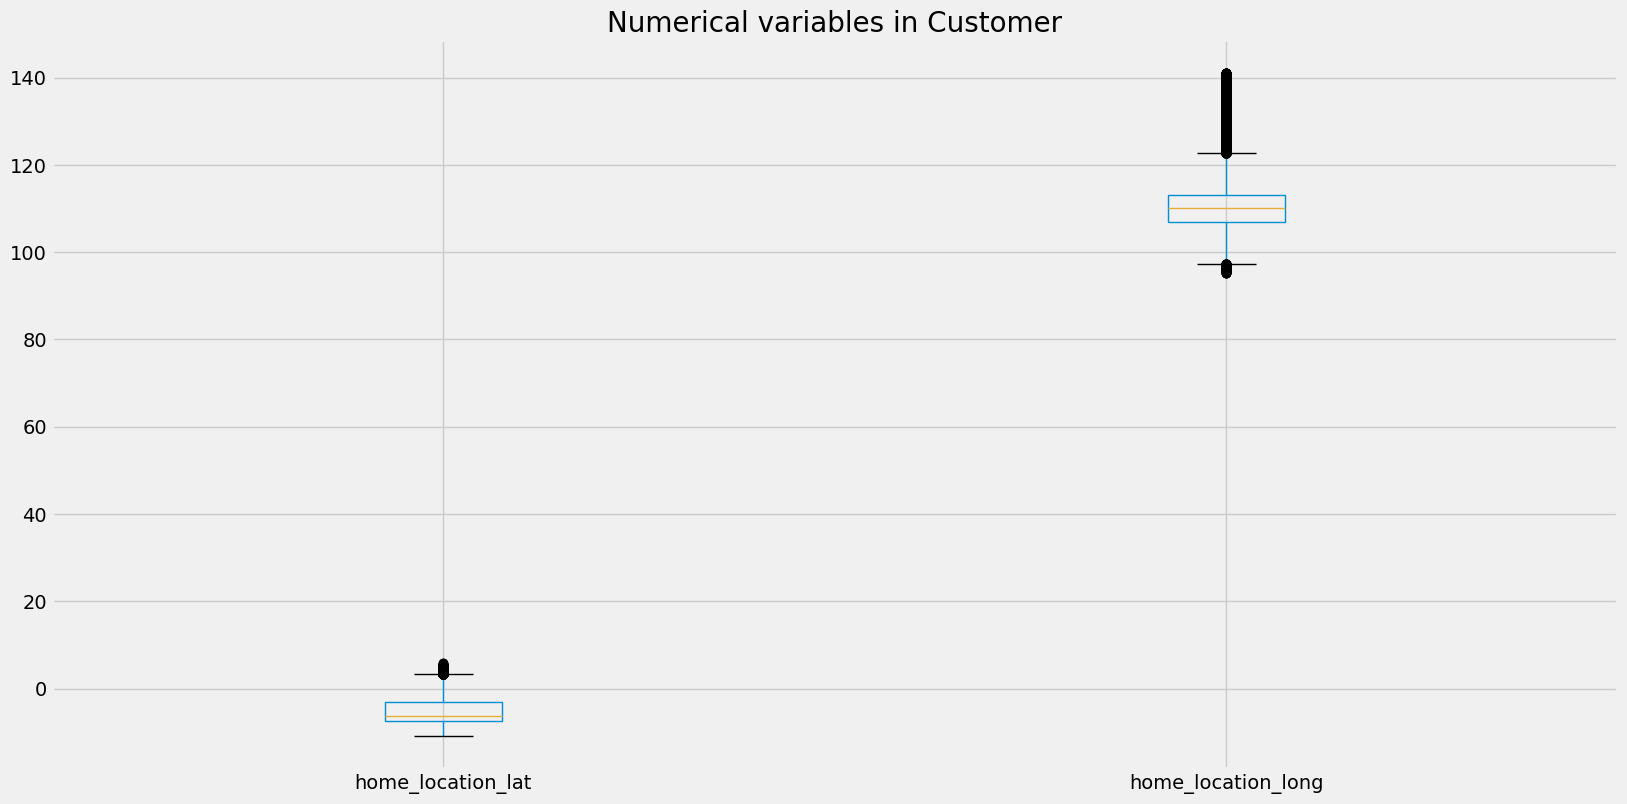

In [ ]:
cust_num = ['home_location_lat','home_location_long']
plt.figure(figsize=(18,9))
cust[cust_num].boxplot()
plt.title("Numerical variables in Customer", fontsize=20)
plt.show()

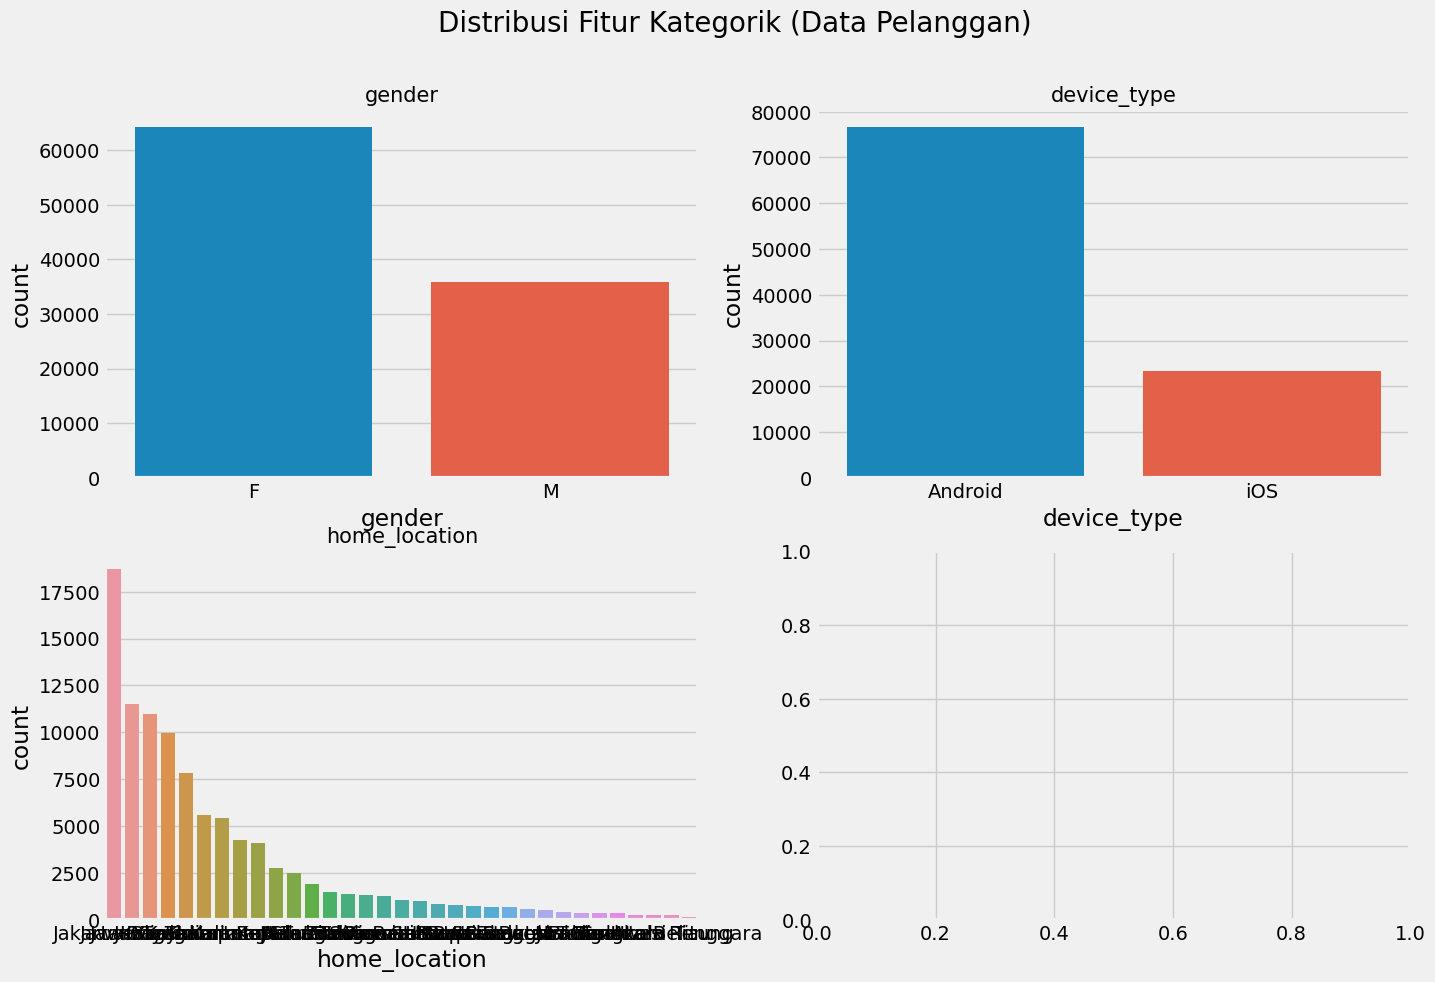

In [ ]:
columns_to_plot = ['gender', 'device_type', 'home_location']

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, data=cust, ax=ax[i//2][i%2], order=cust[col].value_counts().index)
    ax[i//2][i%2].set_title(col, fontsize=15)

fig.suptitle("Distribusi Fitur Kategorik (Data Pelanggan)", fontsize=20)
plt.show()

 # EDA + PREPROCESSING (PRODUCT)

In [ ]:
product = '/content/drive/MyDrive/productss.xlsx'
prod = pd.read_excel(product)
prod.shape

(44446, 12)

In [ ]:
prod.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.00,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.00,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.00,Casual,Titan Women Silver Watch,NaN,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.00,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.00,Casual,Puma Men Grey T-shirt,NaN,NaN


In [ ]:
#Melihat informasi data
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
 10  Unnamed: 10         22 non-null     object 
 11  Unnamed: 11         2 non-null      object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
# melihat statistik data
prod.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44446.00,29692.63,17048.23,1163.00,14770.25,28609.50,44678.75,60000.00
year,44445.00,2012.81,2.13,2007.00,2011.00,2012.00,2015.00,2019.00


In [ ]:
prod.describe(include =  object).T

,count,unique,top,freq
gender,44446,5,Men,22165
masterCategory,44446,7,Apparel,21400
subCategory,44446,45,Topwear,15405
articleType,44446,143,Tshirts,7070
baseColour,44431,46,Black,9732
season,44425,4,Summer,21476
usage,44129,8,Casual,34414
productDisplayName,44439,31135,Lucera Women Silver Earrings,82
Unnamed: 10,22,9,Cufflink and Pocket Square Combo Set,14
Unnamed: 11,2,2,Love Flip-flops,1


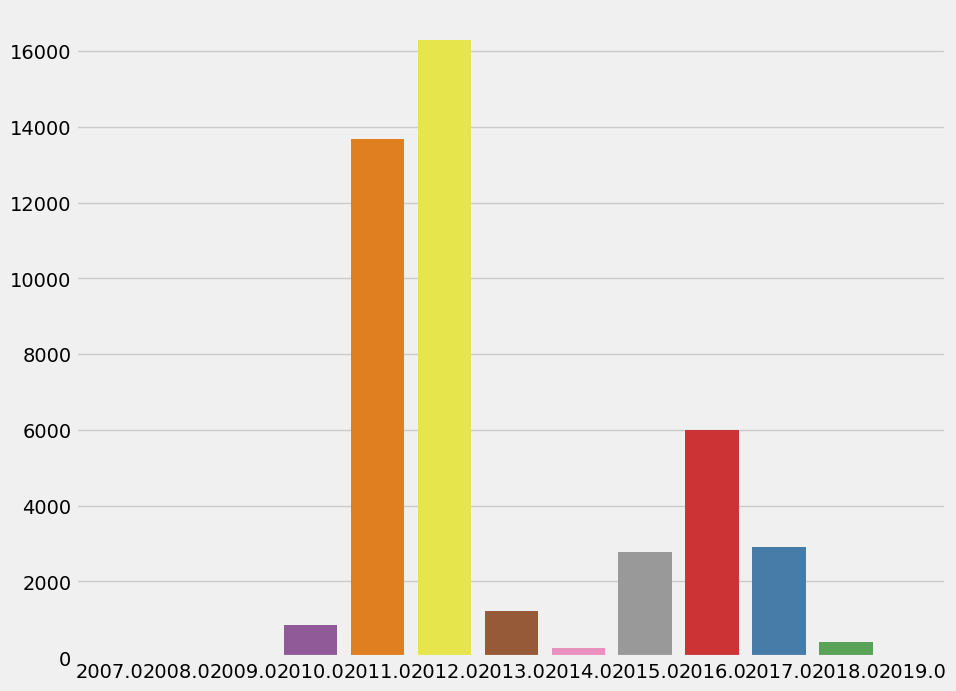

In [ ]:
year_counts =prod['year'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='Set1')
plt.show()

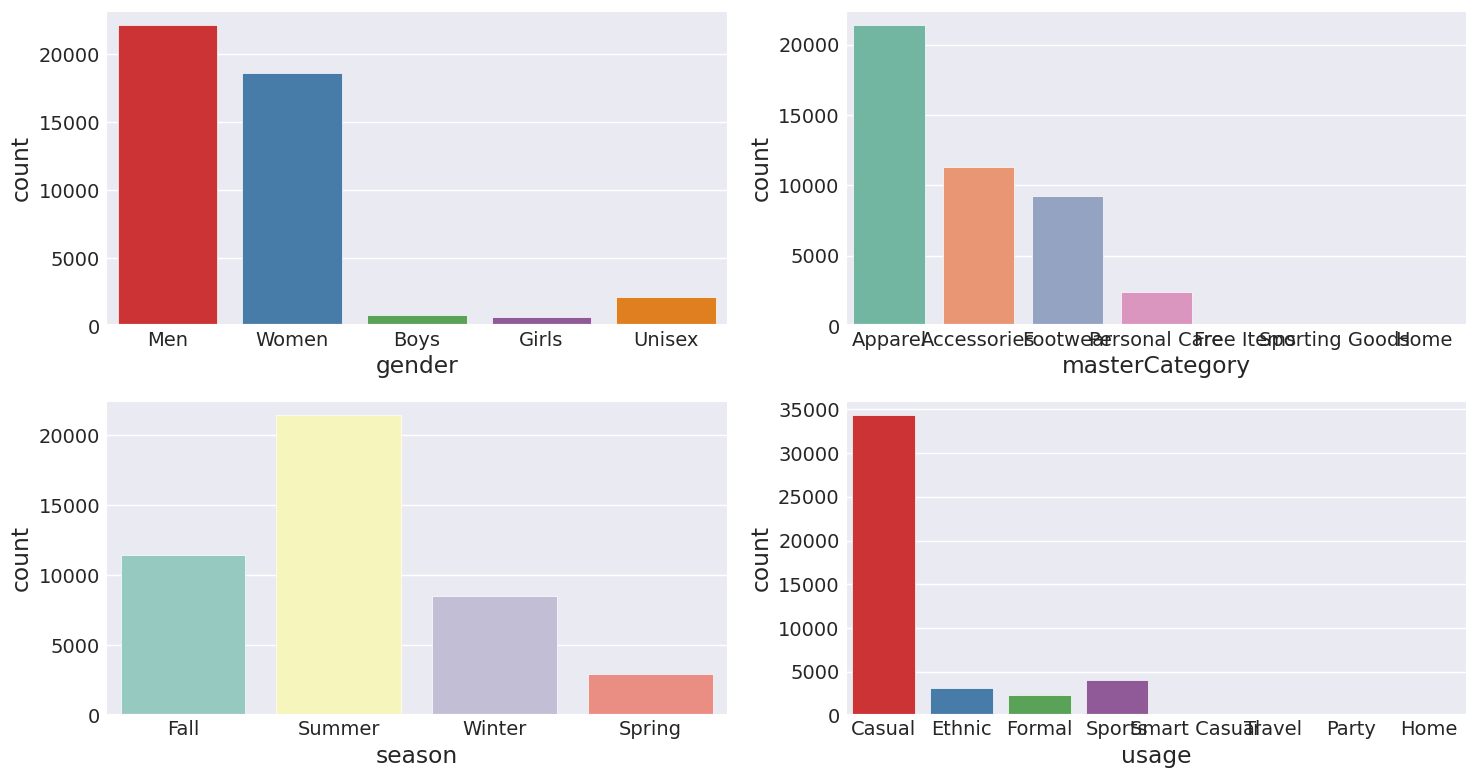

In [ ]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

sns.countplot(ax=ax[0, 0], data=prod, x='gender', palette='Set1')
sns.countplot(ax=ax[0, 1], data=prod, x='masterCategory', palette='Set2')
sns.countplot(ax=ax[1, 0], data=prod, x='season', palette='Set3')
sns.countplot(ax=ax[1, 1], data=prod, x='usage', palette='Set1')

plt.tight_layout()
plt.show()

 # EDA + PREPROCESSING (TRANSACTION)

In [ ]:
transaction = '/content/drive/MyDrive/transactions.csv'
trans = pd.read_csv(transaction)
trans.shape

(852584, 14)

In [ ]:
trans.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753


In [ ]:
#informasi data
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
trans.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,852584.00,49839.20,28999.32,3.00,24563.00,49619.00,74957.00,99999.00
promo_amount,852584.00,2042.08,3063.48,0.00,0.00,0.00,3993.00,24519.00
shipment_fee,852584.00,9189.68,9377.86,0.00,0.00,10000.00,10000.00,50000.00
shipment_location_lat,852584.00,-5.11,3.08,-11.00,-7.38,-6.24,-3.09,5.87
shipment_location_long,852584.00,110.97,6.40,95.03,106.86,110.17,113.19,141.01
total_amount,852584.00,549916.52,815376.14,10898.00,203793.75,302989.00,514702.25,23504487.00


In [ ]:
trans.describe(include =  object).T

,count,unique,top,freq
created_at,852584,852584,2018-07-29T15:22:01.458193Z,1
booking_id,852584,852584,186e2bee-0637-4710-8981-50c2d737bc42,1
session_id,852584,852584,3abaa6ce-e320-4e51-9469-d9f3fa328e86,1
product_metadata,852584,852566,"[{'product_id': 22822, 'quantity': 1, 'item_pr...",2
payment_method,852584,5,Credit Card,299586
payment_status,852584,2,Success,815964
promo_code,326536,8,AZ2022,89227
shipment_date_limit,852584,852584,2018-08-03T05:07:24.812676Z,1


In [ ]:
trans['product_metadata'].value_counts()

[{'product_id': 22822, 'quantity': 1, 'item_price': 327751}]    2
[{'product_id': 3359, 'quantity': 1, 'item_price': 250593}]     2
[{'product_id': 40577, 'quantity': 8, 'item_price': 403749}]    2
[{'product_id': 31709, 'quantity': 1, 'item_price': 92835}]     2
[{'product_id': 10834, 'quantity': 1, 'item_price': 345271}]    2
                                                               ..
[{'product_id': 45720, 'quantity': 1, 'item_price': 183844}]    1
[{'product_id': 58745, 'quantity': 1, 'item_price': 403082}]    1
[{'product_id': 12746, 'quantity': 6, 'item_price': 155618}]    1
[{'product_id': 42641, 'quantity': 1, 'item_price': 392964}]    1
[{'product_id': 47433, 'quantity': 1, 'item_price': 360687}]    1
Name: product_metadata, Length: 852566, dtype: int64

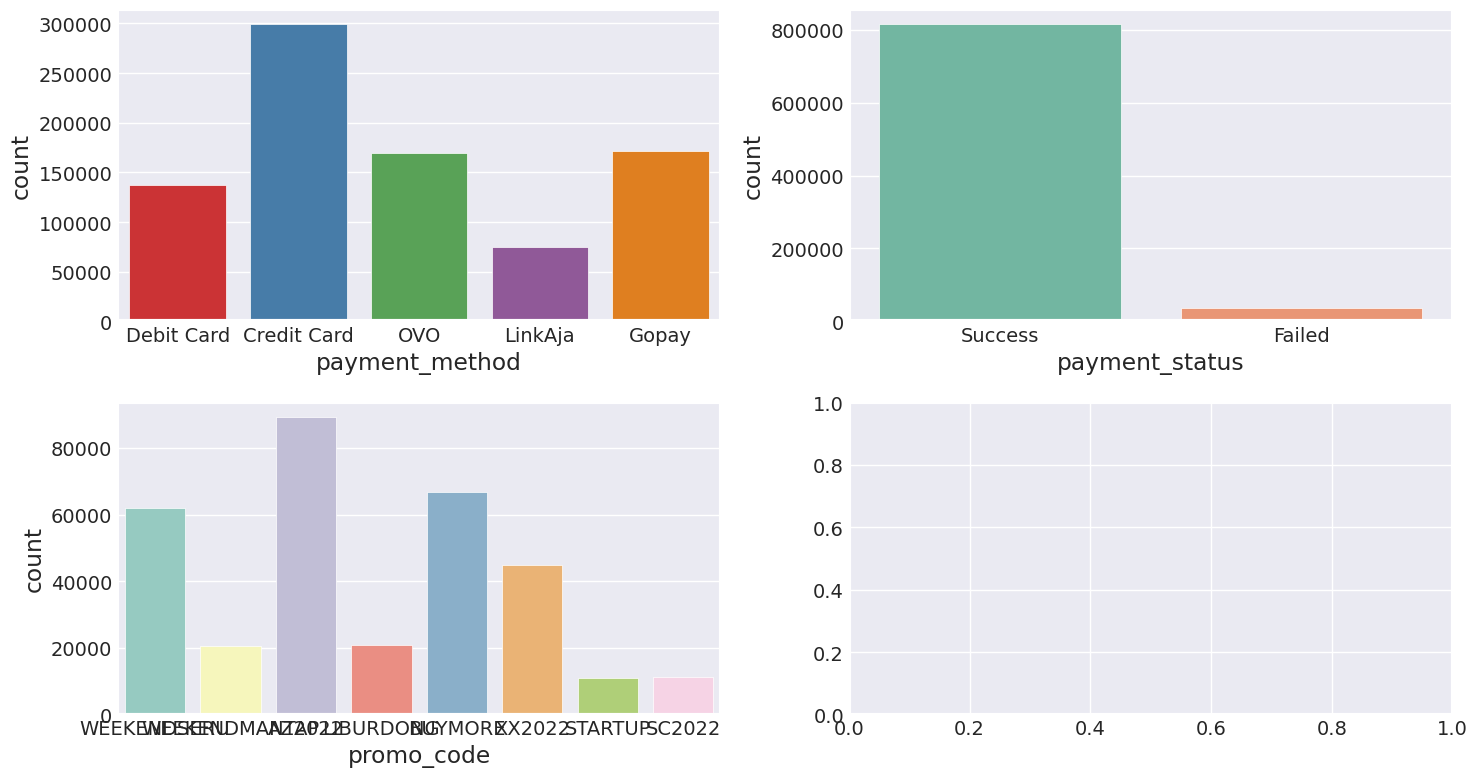

In [ ]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

sns.countplot(ax=ax[0, 0], data=trans, x='payment_method', palette='Set1')
sns.countplot(ax=ax[0, 1], data=trans, x='payment_status', palette='Set2')
sns.countplot(ax=ax[1, 0], data=trans, x='promo_code', palette='Set3')

plt.tight_layout()
plt.show()

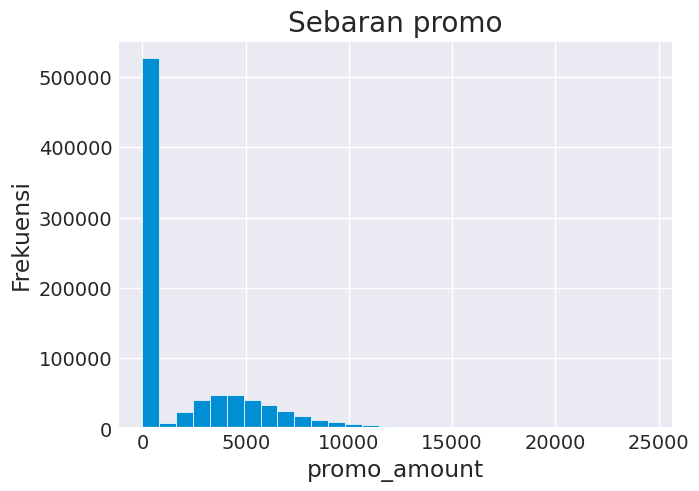

In [ ]:
plt.hist(trans['promo_amount'], bins=30)
plt.xlabel('promo_amount')
plt.ylabel('Frekuensi')
plt.title('Sebaran promo')
plt.show()

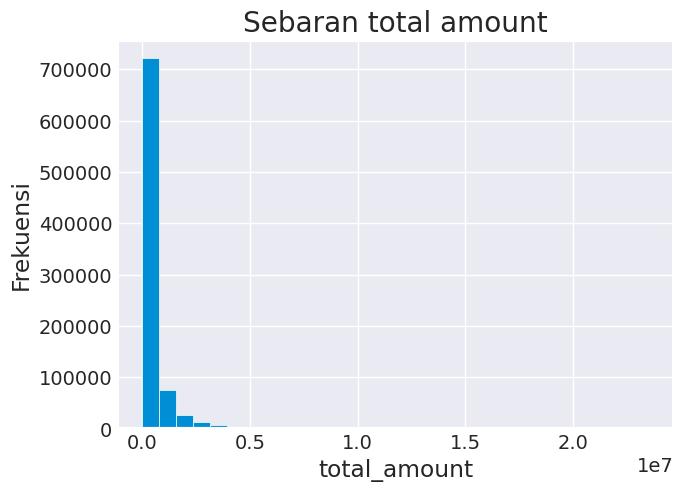

In [ ]:
plt.hist(trans['total_amount'], bins=30)
plt.xlabel('total_amount')
plt.ylabel('Frekuensi')
plt.title('Sebaran total amount')
plt.show()

In [ ]:
trans['created_at'] = pd.to_datetime(trans['created_at'])
trans['shipment_date_limit'] = pd.to_datetime(trans['shipment_date_limit'])

In [ ]:
import json
from matplotlib import transforms
import ast
#change the data type of column 'product_metadata' to be literal

tmp = trans.iloc[:,4].astype('string')
tmp = tmp.map(lambda x: ast.literal_eval(x))
tmp = tmp.to_frame()
trans['product_metadata'] = tmp['product_metadata']

# explode
trans = trans.explode('product_metadata')
trans.reset_index()
metadata = pd.json_normalize(trans.product_metadata)

In [ ]:
metadata

,product_id,quantity,item_price
0,54728,1,191247
1,16193,1,145526
2,53686,4,135174
3,20228,1,271012
4,55220,1,198753
...,...,...,...
1254580,30642,2,113410
1254581,19394,1,354213
1254582,13079,4,288835
1254583,11312,1,188646


In [ ]:
trans = pd.concat([trans.reset_index(), metadata], join = 'outer',axis = 1)

In [ ]:
trans.drop(columns=['product_metadata'], inplace=True)

In [ ]:
trans.head()

,index,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.23,111.97,199832,54728,1,191247
1,1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.01,107.80,155526,16193,1,145526
2,2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.58,115.74,550696,53686,4,135174
3,3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.60,120.36,271012,20228,1,271012
4,4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.60,120.36,198753,55220,1,198753


# EDA + PREPROCESSING ( CLICK STREAM )

In [ ]:
cs = '/content/drive/MyDrive/click_stream.csv'
click = pd.read_csv(cs)
click.shape

(12833602, 6)

In [ ]:
click.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [ ]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
click.describe(include = object)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
count,12833602,12833602,12833602,12833602,12833602,4289540
unique,895203,9,12814223,12833602,2,2006748
top,65383bfb-5535-445f-ab52-aec4658eb0bd,CLICK,2021-05-02T11:28:41.047631Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,{'payment_status': 'Success'}
freq,650,2498038,451,1,11548304,815962


# DATA PREPARATION

In [ ]:
trans_test = trans.copy()
a = trans_test[((trans_test["customer_id"] == 83397) & (trans_test["created_at"] >= "2022-07-01") & (trans_test["created_at"] <= "2022-07-31"))]
a.head()

,index,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
817171,554674,2022-07-02 07:15:14.008860+00:00,83397,1de4614f-384e-4b55-a14f-62bca5a22604,c75dbe6f-91a7-4605-849d-e476e87f6d21,OVO,Success,0,NaN,10000,2022-07-08 05:52:48.543892+00:00,1.48,125.02,579039,51007,1,256597
817172,554674,2022-07-02 07:15:14.008860+00:00,83397,1de4614f-384e-4b55-a14f-62bca5a22604,c75dbe6f-91a7-4605-849d-e476e87f6d21,OVO,Success,0,NaN,10000,2022-07-08 05:52:48.543892+00:00,1.48,125.02,579039,18610,1,312442
817173,554675,2022-07-11 07:29:17.008860+00:00,83397,11f99ad7-7b4c-487d-8440-8db7ec164bc2,6f80b220-a0de-413b-80a0-24b992b2ea05,OVO,Success,0,NaN,0,2022-07-14 11:00:55.764326+00:00,-7.14,113.21,417114,8674,3,139038
817174,554676,2022-07-20 07:35:48.008860+00:00,83397,0a9c2386-f6e6-495b-8cf2-cdfc9fa6dd08,4f369e76-2298-4f94-b5be-5fe0e687cd7b,OVO,Success,8606,AZ2022,0,2022-07-25 03:23:38.039978+00:00,-7.14,113.21,86009,9418,1,94615
817175,554677,2022-07-29 07:36:22.008860+00:00,83397,b411082d-b120-4134-a8a1-b472d516c1c2,dc79d072-52b3-42d3-a295-6ae8eb88335e,LinkAja,Success,9598,BUYMORE,0,2022-07-31 14:53:20.157326+00:00,-7.14,113.21,221349,15087,1,230947


In [ ]:
trans['payment_status'].value_counts()

Success    1201035
Failed       53550
Name: payment_status, dtype: int64

In [ ]:
trans2 = trans[trans["payment_status"] == "Success"]
trans2.shape

(1201035, 17)

In [ ]:
a = trans2[((trans2["customer_id"] == 83397) & (trans2["created_at"] >= "2022-07-01") & (trans2["created_at"] <= "2022-07-31"))]
a.head()

,index,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
817171,554674,2022-07-02 07:15:14.008860+00:00,83397,1de4614f-384e-4b55-a14f-62bca5a22604,c75dbe6f-91a7-4605-849d-e476e87f6d21,OVO,Success,0,NaN,10000,2022-07-08 05:52:48.543892+00:00,1.48,125.02,579039,51007,1,256597
817172,554674,2022-07-02 07:15:14.008860+00:00,83397,1de4614f-384e-4b55-a14f-62bca5a22604,c75dbe6f-91a7-4605-849d-e476e87f6d21,OVO,Success,0,NaN,10000,2022-07-08 05:52:48.543892+00:00,1.48,125.02,579039,18610,1,312442
817173,554675,2022-07-11 07:29:17.008860+00:00,83397,11f99ad7-7b4c-487d-8440-8db7ec164bc2,6f80b220-a0de-413b-80a0-24b992b2ea05,OVO,Success,0,NaN,0,2022-07-14 11:00:55.764326+00:00,-7.14,113.21,417114,8674,3,139038
817174,554676,2022-07-20 07:35:48.008860+00:00,83397,0a9c2386-f6e6-495b-8cf2-cdfc9fa6dd08,4f369e76-2298-4f94-b5be-5fe0e687cd7b,OVO,Success,8606,AZ2022,0,2022-07-25 03:23:38.039978+00:00,-7.14,113.21,86009,9418,1,94615
817175,554677,2022-07-29 07:36:22.008860+00:00,83397,b411082d-b120-4134-a8a1-b472d516c1c2,dc79d072-52b3-42d3-a295-6ae8eb88335e,LinkAja,Success,9598,BUYMORE,0,2022-07-31 14:53:20.157326+00:00,-7.14,113.21,221349,15087,1,230947


In [ ]:
trans2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201035 entries, 0 to 1254584
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   index                   1201035 non-null  int64              
 1   created_at              1201035 non-null  datetime64[ns, UTC]
 2   customer_id             1201035 non-null  int64              
 3   booking_id              1201035 non-null  object             
 4   session_id              1201035 non-null  object             
 5   payment_method          1201035 non-null  object             
 6   payment_status          1201035 non-null  object             
 7   promo_amount            1201035 non-null  int64              
 8   promo_code              460971 non-null   object             
 9   shipment_fee            1201035 non-null  int64              
 10  shipment_date_limit     1201035 non-null  datetime64[ns, UTC]
 11  shipment_lo

In [ ]:
trans3 = trans2.copy()
trans3['partition_date'] = trans3['created_at'].dt.to_period('M')
trans3.head()

<ipython-input-42-b6ad97cc7cb0>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trans3['partition_date'] = trans3['created_at'].dt.to_period('M')


,index,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,partition_date
0,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.23,111.97,199832,54728,1,191247,2018-07
1,1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.01,107.80,155526,16193,1,145526,2018-07
2,2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.58,115.74,550696,53686,4,135174,2018-09
3,3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.60,120.36,271012,20228,1,271012,2018-11
4,4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.60,120.36,198753,55220,1,198753,2018-12


In [ ]:
trans3 = pd.get_dummies(trans3, columns = ['payment_method'])
trans3.head()

,index,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,partition_date,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
0,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.23,111.97,199832,54728,1,191247,2018-07,0,1,0,0,0
1,1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.01,107.80,155526,16193,1,145526,2018-07,1,0,0,0,0
2,2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.58,115.74,550696,53686,4,135174,2018-09,0,0,0,0,1
3,3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.60,120.36,271012,20228,1,271012,2018-11,1,0,0,0,0
4,4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.60,120.36,198753,55220,1,198753,2018-12,1,0,0,0,0


In [ ]:
trans3.columns

Index(['index', 'created_at', 'customer_id', 'booking_id', 'session_id',
       'payment_status', 'promo_amount', 'promo_code', 'shipment_fee',
       'shipment_date_limit', 'shipment_location_lat',
       'shipment_location_long', 'total_amount', 'product_id', 'quantity',
       'item_price', 'partition_date', 'payment_method_Credit Card',
       'payment_method_Debit Card', 'payment_method_Gopay',
       'payment_method_LinkAja', 'payment_method_OVO'],
      dtype='object')

In [ ]:
a = trans3[((trans3["customer_id"] == 83397) & (trans3["partition_date"] == "2022-07"))]
a

,index,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,partition_date,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
817171,554674,2022-07-02 07:15:14.008860+00:00,83397,1de4614f-384e-4b55-a14f-62bca5a22604,c75dbe6f-91a7-4605-849d-e476e87f6d21,Success,0,NaN,10000,2022-07-08 05:52:48.543892+00:00,1.48,125.02,579039,51007,1,256597,2022-07,0,0,0,0,1
817172,554674,2022-07-02 07:15:14.008860+00:00,83397,1de4614f-384e-4b55-a14f-62bca5a22604,c75dbe6f-91a7-4605-849d-e476e87f6d21,Success,0,NaN,10000,2022-07-08 05:52:48.543892+00:00,1.48,125.02,579039,18610,1,312442,2022-07,0,0,0,0,1
817173,554675,2022-07-11 07:29:17.008860+00:00,83397,11f99ad7-7b4c-487d-8440-8db7ec164bc2,6f80b220-a0de-413b-80a0-24b992b2ea05,Success,0,NaN,0,2022-07-14 11:00:55.764326+00:00,-7.14,113.21,417114,8674,3,139038,2022-07,0,0,0,0,1
817174,554676,2022-07-20 07:35:48.008860+00:00,83397,0a9c2386-f6e6-495b-8cf2-cdfc9fa6dd08,4f369e76-2298-4f94-b5be-5fe0e687cd7b,Success,8606,AZ2022,0,2022-07-25 03:23:38.039978+00:00,-7.14,113.21,86009,9418,1,94615,2022-07,0,0,0,0,1
817175,554677,2022-07-29 07:36:22.008860+00:00,83397,b411082d-b120-4134-a8a1-b472d516c1c2,dc79d072-52b3-42d3-a295-6ae8eb88335e,Success,9598,BUYMORE,0,2022-07-31 14:53:20.157326+00:00,-7.14,113.21,221349,15087,1,230947,2022-07,0,0,0,1,0


## Gabungan data Transaction + Product

In [ ]:
trans_prod = pd.merge(trans3,prod[["id","gender","masterCategory","subCategory",'articleType']], left_on = ["product_id"], right_on = ["id"] , how = "left")
trans_prod.shape

(1201035, 27)

In [ ]:
trans_prod.head()

,index,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,partition_date,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,id,gender,masterCategory,subCategory,articleType
0,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.23,111.97,199832,54728,1,191247,2018-07,0,1,0,0,0,54728,Men,Footwear,Shoes,Casual Shoes
1,1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.01,107.80,155526,16193,1,145526,2018-07,1,0,0,0,0,16193,Men,Apparel,Topwear,Sweaters
2,2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.58,115.74,550696,53686,4,135174,2018-09,0,0,0,0,1,53686,Women,Accessories,Bags,Handbags
3,3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.60,120.36,271012,20228,1,271012,2018-11,1,0,0,0,0,20228,Women,Apparel,Topwear,Sweaters
4,4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.60,120.36,198753,55220,1,198753,2018-12,1,0,0,0,0,55220,Women,Personal Care,Lips,Lip Liner


In [ ]:
trans_prod2 = pd.get_dummies(trans_prod, columns = ['masterCategory'])
trans_prod2.head()

,index,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,partition_date,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,id,gender,subCategory,articleType,masterCategory_Accessories,masterCategory_Apparel,masterCategory_Footwear,masterCategory_Free Items,masterCategory_Home,masterCategory_Personal Care,masterCategory_Sporting Goods
0,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.23,111.97,199832,54728,1,191247,2018-07,0,1,0,0,0,54728,Men,Shoes,Casual Shoes,0,0,1,0,0,0,0
1,1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.01,107.80,155526,16193,1,145526,2018-07,1,0,0,0,0,16193,Men,Topwear,Sweaters,0,1,0,0,0,0,0
2,2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.58,115.74,550696,53686,4,135174,2018-09,0,0,0,0,1,53686,Women,Bags,Handbags,1,0,0,0,0,0,0
3,3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.60,120.36,271012,20228,1,271012,2018-11,1,0,0,0,0,20228,Women,Topwear,Sweaters,0,1,0,0,0,0,0
4,4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.60,120.36,198753,55220,1,198753,2018-12,1,0,0,0,0,55220,Women,Lips,Lip Liner,0,0,0,0,0,1,0


In [ ]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
click2 = pd.get_dummies(click, columns = ['event_name','traffic_source'])
click2

,session_id,event_time,event_id,event_metadata,event_name_ADD_PROMO,event_name_ADD_TO_CART,event_name_BOOKING,event_name_CLICK,event_name_HOMEPAGE,event_name_ITEM_DETAIL,event_name_PROMO_PAGE,event_name_SCROLL,event_name_SEARCH,traffic_source_MOBILE,traffic_source_WEB
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,NaN,0,0,0,0,1,0,0,0,0,1,0
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,NaN,0,0,0,0,0,0,0,1,0,1,0
2,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,NaN,0,0,0,0,1,0,0,0,0,1,0
3,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,"{'product_id': 15315, 'quantity': 4, 'item_pri...",0,1,0,0,0,0,0,0,0,1,0
4,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,{'payment_status': 'Success'},0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,{'search_keywords': 'Bekas'},0,0,0,0,0,0,0,0,1,1,0
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,NaN,0,0,0,0,1,0,0,0,0,1,0
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,"{'product_id': 19820, 'quantity': 1, 'item_pri...",0,1,0,0,0,0,0,0,0,1,0
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,{'payment_status': 'Success'},0,0,1,0,0,0,0,0,0,1,0


In [ ]:
click2["event_time"] = pd.to_datetime(click2["event_time"])
click2.dtypes

session_id                            object
event_time               datetime64[ns, UTC]
event_id                              object
event_metadata                        object
event_name_ADD_PROMO                   uint8
                                ...         
event_name_PROMO_PAGE                  uint8
event_name_SCROLL                      uint8
event_name_SEARCH                      uint8
traffic_source_MOBILE                  uint8
traffic_source_WEB                     uint8
Length: 15, dtype: object

In [ ]:
click2["event_time2"] = click2["event_time"]
click2.head()

,session_id,event_time,event_id,event_metadata,event_name_ADD_PROMO,event_name_ADD_TO_CART,event_name_BOOKING,event_name_CLICK,event_name_HOMEPAGE,event_name_ITEM_DETAIL,event_name_PROMO_PAGE,event_name_SCROLL,event_name_SEARCH,traffic_source_MOBILE,traffic_source_WEB,event_time2
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,NaN,0,0,0,0,1,0,0,0,0,1,0,2019-09-06 15:54:32.821085+00:00
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,NaN,0,0,0,0,0,0,0,1,0,1,0,2019-09-06 16:03:57.821085+00:00
2,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,NaN,0,0,0,0,1,0,0,0,0,1,0,2019-09-01 12:05:10.322763+00:00
3,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,"{'product_id': 15315, 'quantity': 4, 'item_pri...",0,1,0,0,0,0,0,0,0,1,0,2019-09-01 12:06:33.322763+00:00
4,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,{'payment_status': 'Success'},0,0,1,0,0,0,0,0,0,1,0,2019-09-01 12:15:29.425431+00:00


In [ ]:
click2.columns

Index(['session_id', 'event_time', 'event_id', 'event_metadata',
       'event_name_ADD_PROMO', 'event_name_ADD_TO_CART', 'event_name_BOOKING',
       'event_name_CLICK', 'event_name_HOMEPAGE', 'event_name_ITEM_DETAIL',
       'event_name_PROMO_PAGE', 'event_name_SCROLL', 'event_name_SEARCH',
       'traffic_source_MOBILE', 'traffic_source_WEB', 'event_time2'],
      dtype='object')

In [ ]:
#Melakukan aggregasi
click3 = click2.groupby(["session_id"], as_index = False).agg({ "event_time" : ["min"], "event_time2" : ["max"] ,
                                                                                                    "event_name_ADD_PROMO" : ["sum"],
                                                                                                    "event_name_ADD_TO_CART" : ["sum"],
                                                                                                    "event_name_BOOKING" : ["sum"] ,
                                                                                                    'event_name_CLICK' : ['sum'] ,
                                                                                                    'event_name_HOMEPAGE' : ['sum'] ,
                                                                                                    'event_name_ITEM_DETAIL' : ['sum'] ,
                                                                                                    'event_name_PROMO_PAGE' : ['sum'] ,
                                                                                                    'event_name_SCROLL' : ['sum'] ,
                                                                                                    'event_name_SEARCH' : ['sum'] ,
                                                                                                    'traffic_source_MOBILE' : ['sum'] ,
                                                                                                    'traffic_source_WEB' : ['sum'] ,
})

click3.columns = list(map(''.join,click3.columns.values))


In [ ]:
click3.head()

,session_id,event_timemin,event_time2max,event_name_ADD_PROMOsum,event_name_ADD_TO_CARTsum,event_name_BOOKINGsum,event_name_CLICKsum,event_name_HOMEPAGEsum,event_name_ITEM_DETAILsum,event_name_PROMO_PAGEsum,event_name_SCROLLsum,event_name_SEARCHsum,traffic_source_MOBILEsum,traffic_source_WEBsum
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 11:51:52.276396+00:00,2019-05-19 20:17:04.276396+00:00,0,1,1,2,2,1,0,1,0,8,0
1,00003eca-954b-4150-aee1-63fc62f395cf,2019-08-24 05:47:16.849738+00:00,2019-08-24 06:26:12.662344+00:00,0,1,1,0,1,0,1,0,0,4,0
2,0000425b-ddc8-4459-a240-6ba814dac132,2019-02-05 13:38:59.490443+00:00,2019-04-28 10:08:01.490443+00:00,0,1,1,0,1,0,1,0,0,4,0
3,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08 23:17:19.510057+00:00,2022-03-08 23:21:35.510057+00:00,0,1,1,23,9,8,1,12,11,66,0
4,0000649b-9514-4600-979b-42166a798996,2020-07-17 13:32:48.525079+00:00,2020-07-23 14:31:15.525079+00:00,1,3,1,3,3,3,1,2,1,18,0


In [ ]:
click3["lama_browse"]  = click3["event_time2max"] - click3["event_timemin"]
click3

,session_id,event_timemin,event_time2max,event_name_ADD_PROMOsum,event_name_ADD_TO_CARTsum,event_name_BOOKINGsum,event_name_CLICKsum,event_name_HOMEPAGEsum,event_name_ITEM_DETAILsum,event_name_PROMO_PAGEsum,event_name_SCROLLsum,event_name_SEARCHsum,traffic_source_MOBILEsum,traffic_source_WEBsum,lama_browse
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 11:51:52.276396+00:00,2019-05-19 20:17:04.276396+00:00,0,1,1,2,2,1,0,1,0,8,0,2 days 08:25:12
1,00003eca-954b-4150-aee1-63fc62f395cf,2019-08-24 05:47:16.849738+00:00,2019-08-24 06:26:12.662344+00:00,0,1,1,0,1,0,1,0,0,4,0,0 days 00:38:55.812606
2,0000425b-ddc8-4459-a240-6ba814dac132,2019-02-05 13:38:59.490443+00:00,2019-04-28 10:08:01.490443+00:00,0,1,1,0,1,0,1,0,0,4,0,81 days 20:29:02
3,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08 23:17:19.510057+00:00,2022-03-08 23:21:35.510057+00:00,0,1,1,23,9,8,1,12,11,66,0,0 days 00:04:16
4,0000649b-9514-4600-979b-42166a798996,2020-07-17 13:32:48.525079+00:00,2020-07-23 14:31:15.525079+00:00,1,3,1,3,3,3,1,2,1,18,0,6 days 00:58:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895198,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,2021-10-04 21:17:12.231938+00:00,2021-10-08 15:22:31.231938+00:00,1,2,1,3,5,0,3,2,2,0,19,3 days 18:05:19
895199,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11-27 12:53:13.983243+00:00,2021-11-28 03:26:04.983243+00:00,1,4,1,3,2,2,0,5,1,19,0,0 days 14:32:51
895200,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11-04 10:03:00.117552+00:00,2020-11-11 14:59:29.117552+00:00,0,1,1,11,7,5,2,11,2,40,0,7 days 04:56:29
895201,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02-24 17:40:30.937313+00:00,2021-02-26 16:52:59.937313+00:00,1,5,1,4,1,1,0,1,1,15,0,1 days 23:12:29


In [ ]:
click3[click3["session_id"] == "3abaa6ce-e320-4e51-9469-d9f3fa328e86"]

,session_id,event_timemin,event_time2max,event_name_ADD_PROMOsum,event_name_ADD_TO_CARTsum,event_name_BOOKINGsum,event_name_CLICKsum,event_name_HOMEPAGEsum,event_name_ITEM_DETAILsum,event_name_PROMO_PAGEsum,event_name_SCROLLsum,event_name_SEARCHsum,traffic_source_MOBILEsum,traffic_source_WEBsum,lama_browse
204778,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 14:41:48.913621+00:00,2018-07-29 15:22:01.458193+00:00,1,4,1,7,4,2,5,0,1,0,25,0 days 00:40:12.544572


In [ ]:
click3.columns

Index(['session_id', 'event_timemin', 'event_time2max',
       'event_name_ADD_PROMOsum', 'event_name_ADD_TO_CARTsum',
       'event_name_BOOKINGsum', 'event_name_CLICKsum',
       'event_name_HOMEPAGEsum', 'event_name_ITEM_DETAILsum',
       'event_name_PROMO_PAGEsum', 'event_name_SCROLLsum',
       'event_name_SEARCHsum', 'traffic_source_MOBILEsum',
       'traffic_source_WEBsum', 'lama_browse'],
      dtype='object')

## Gabungan data trans_prod + click

In [ ]:
trans_prod_click = pd.merge(trans_prod2,click3[['session_id',
       'event_name_ADD_PROMOsum', 'event_name_ADD_TO_CARTsum',
       'event_name_BOOKINGsum', 'event_name_CLICKsum',
       'event_name_HOMEPAGEsum', 'event_name_ITEM_DETAILsum',
       'event_name_PROMO_PAGEsum', 'event_name_SCROLLsum',
       'event_name_SEARCHsum', 'traffic_source_MOBILEsum',
       'traffic_source_WEBsum', 'lama_browse']], on = ["session_id"] , how = "left")
trans_prod_click.shape

(1201035, 45)

In [ ]:
trans_prod_click.head()

,index,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,partition_date,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,id,gender,subCategory,articleType,masterCategory_Accessories,masterCategory_Apparel,masterCategory_Footwear,masterCategory_Free Items,masterCategory_Home,masterCategory_Personal Care,masterCategory_Sporting Goods,event_name_ADD_PROMOsum,event_name_ADD_TO_CARTsum,event_name_BOOKINGsum,event_name_CLICKsum,event_name_HOMEPAGEsum,event_name_ITEM_DETAILsum,event_name_PROMO_PAGEsum,event_name_SCROLLsum,event_name_SEARCHsum,traffic_source_MOBILEsum,traffic_source_WEBsum,lama_browse
0,0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.23,111.97,199832,54728,1,191247,2018-07,0,1,0,0,0,54728,Men,Shoes,Casual Shoes,0,0,1,0,0,0,0,1.00,4.00,1.00,7.00,4.00,2.00,5.00,0.00,1.00,0.00,25.00,0 days 00:40:12.544572
1,1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.01,107.80,155526,16193,1,145526,2018-07,1,0,0,0,0,16193,Men,Topwear,Sweaters,0,1,0,0,0,0,0,0.00,1.00,1.00,3.00,3.00,1.00,2.00,3.00,1.00,15.00,0.00,0 days 00:01:28.724945
2,2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.58,115.74,550696,53686,4,135174,2018-09,0,0,0,0,1,53686,Women,Bags,Handbags,1,0,0,0,0,0,0,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,4.00,0.00,0 days 00:02:38
3,3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.60,120.36,271012,20228,1,271012,2018-11,1,0,0,0,0,20228,Women,Topwear,Sweaters,0,1,0,0,0,0,0,0.00,3.00,1.00,0.00,2.00,1.00,0.00,1.00,1.00,9.00,0.00,21 days 14:51:12
4,4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.60,120.36,198753,55220,1,198753,2018-12,1,0,0,0,0,55220,Women,Lips,Lip Liner,0,0,0,0,0,1,0,0.00,1.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,4.00,0.00,27 days 02:26:56


In [ ]:
trans_prod_click.columns

Index(['index', 'created_at', 'customer_id', 'booking_id', 'session_id',
       'payment_status', 'promo_amount', 'promo_code', 'shipment_fee',
       'shipment_date_limit', 'shipment_location_lat',
       'shipment_location_long', 'total_amount', 'product_id', 'quantity',
       'item_price', 'partition_date', 'payment_method_Credit Card',
       'payment_method_Debit Card', 'payment_method_Gopay',
       'payment_method_LinkAja', 'payment_method_OVO', 'id', 'gender',
       'subCategory', 'articleType', 'masterCategory_Accessories',
       'masterCategory_Apparel', 'masterCategory_Footwear',
       'masterCategory_Free Items', 'masterCategory_Home',
       'masterCategory_Personal Care', 'masterCategory_Sporting Goods',
       'event_name_ADD_PROMOsum', 'event_name_ADD_TO_CARTsum',
       'event_name_BOOKINGsum', 'event_name_CLICKsum',
       'event_name_HOMEPAGEsum', 'event_name_ITEM_DETAILsum',
       'event_name_PROMO_PAGEsum', 'event_name_SCROLLsum',
       'event_name_SEARCHsum'

## datamart lanjutan

In [ ]:
trans_prod_click2 = trans_prod_click.groupby(["customer_id","partition_date"], as_index = False).agg({"quantity" : ["sum"],
                                                                                                  'masterCategory_Accessories' : ["sum"],
                                                                                                  'masterCategory_Apparel' : ["sum"],
                                                                                                  'masterCategory_Footwear' : ["sum"],
                                                                                                  'masterCategory_Free Items': ["sum"],
                                                                                                  'masterCategory_Home' : ["sum"],
                                                                                                  'masterCategory_Personal Care' : ["sum"],
                                                                                                  'masterCategory_Sporting Goods' : ["sum"],
                                                                                                  'event_name_ADD_PROMOsum' : ["sum"],
                                                                                                  'event_name_ADD_TO_CARTsum' : ["sum"],
                                                                                                  'event_name_BOOKINGsum' : ["sum"],
                                                                                                  'event_name_CLICKsum' : ["sum"],
                                                                                                  'event_name_HOMEPAGEsum' : ["sum"],
                                                                                                  'event_name_ITEM_DETAILsum' : ["sum"],
                                                                                                  'event_name_PROMO_PAGEsum' : ["sum"],
                                                                                                  'event_name_SCROLLsum' : ["sum"],
                                                                                                  'event_name_SEARCHsum' : ["sum"],
                                                                                                  'traffic_source_MOBILEsum' : ["sum"],
                                                                                                  'traffic_source_WEBsum' : ["sum"],
                                                                                                  'lama_browse' : ["sum"]

})

trans_prod_click2.columns = list(map(''.join,trans_prod_click2.columns.values))


In [ ]:
trans_prod_click2.head()

,customer_id,partition_date,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum
0,3,2018-08,5,0,0,0,0,0,1,0,1.00,2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,8.00,0.00,0 days 00:00:14.938004
1,3,2018-09,1,0,0,1,0,0,0,0,0.00,3.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,0.00,4 days 02:58:03
2,3,2018-10,1,0,1,0,0,0,0,0,1.00,3.00,1.00,6.00,4.00,2.00,3.00,4.00,1.00,25.00,0.00,18 days 18:29:38
3,3,2018-11,1,1,0,0,0,0,0,0,1.00,3.00,1.00,0.00,1.00,2.00,0.00,0.00,1.00,9.00,0.00,5 days 15:21:45
4,3,2018-12,1,1,0,0,0,0,0,0,1.00,4.00,1.00,7.00,3.00,1.00,3.00,3.00,1.00,24.00,0.00,2 days 12:05:51


In [ ]:
trans_prod_click_noduplicates = trans_prod_click.drop_duplicates(subset=['booking_id'])
trans_prod_click_noduplicates.shape

(815964, 45)

In [ ]:
trans_prod_click_noduplicates2 = trans_prod_click_noduplicates.groupby(["customer_id","partition_date"], as_index = False).agg({ "booking_id" : ["count"], "promo_amount" : ["sum"] ,
                                                                                                    "promo_code" : ["count"],
                                                                                                    "shipment_fee" : ["sum"],
                                                                                                    "total_amount" : ["sum"] ,
                                                                                                    'payment_method_Credit Card' : ['sum'] ,
                                                                                                    'payment_method_Debit Card' : ['sum'] ,
                                                                                                    'payment_method_Gopay' : ['sum'] ,
                                                                                                    'payment_method_LinkAja' : ['sum'] ,
                                                                                                    'payment_method_OVO' : ['sum']
})

trans_prod_click_noduplicates2.columns = list(map(''.join,trans_prod_click_noduplicates2.columns.values))


In [ ]:
trans_prod_click_noduplicates2.columns

Index(['customer_id', 'partition_date', 'booking_idcount', 'promo_amountsum',
       'promo_codecount', 'shipment_feesum', 'total_amountsum',
       'payment_method_Credit Cardsum', 'payment_method_Debit Cardsum',
       'payment_method_Gopaysum', 'payment_method_LinkAjasum',
       'payment_method_OVOsum'],
      dtype='object')

In [ ]:
trans_prod_click_noduplicates2.head()

,customer_id,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum
0,3,2018-08,1,8073,1,0,826597,1,0,0,0,0
1,3,2018-09,1,0,0,10000,163784,1,0,0,0,0
2,3,2018-10,1,8828,1,10000,124932,1,0,0,0,0
3,3,2018-11,1,3415,1,0,247902,1,0,0,0,0
4,3,2018-12,1,2645,1,10000,181237,1,0,0,0,0


## Gabungan Cust id all + trans_prod_click all

In [ ]:
tpc = pd.merge(trans_prod_click_noduplicates2,trans_prod_click2, on = ["customer_id","partition_date"], how = "left")
tpc.head()

,customer_id,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum
0,3,2018-08,1,8073,1,0,826597,1,0,0,0,0,5,0,0,0,0,0,1,0,1.00,2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,8.00,0.00,0 days 00:00:14.938004
1,3,2018-09,1,0,0,10000,163784,1,0,0,0,0,1,0,0,1,0,0,0,0,0.00,3.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,0.00,4 days 02:58:03
2,3,2018-10,1,8828,1,10000,124932,1,0,0,0,0,1,0,1,0,0,0,0,0,1.00,3.00,1.00,6.00,4.00,2.00,3.00,4.00,1.00,25.00,0.00,18 days 18:29:38
3,3,2018-11,1,3415,1,0,247902,1,0,0,0,0,1,1,0,0,0,0,0,0,1.00,3.00,1.00,0.00,1.00,2.00,0.00,0.00,1.00,9.00,0.00,5 days 15:21:45
4,3,2018-12,1,2645,1,10000,181237,1,0,0,0,0,1,1,0,0,0,0,0,0,1.00,4.00,1.00,7.00,3.00,1.00,3.00,3.00,1.00,24.00,0.00,2 days 12:05:51


In [ ]:
print(len(pd.unique(tpc['customer_id'])))

50242


In [ ]:
cust["first_join_date"] = pd.to_datetime(cust["first_join_date"])
cust["birthdate"] = pd.to_datetime(cust["birthdate"])

In [ ]:
cust = cust[['customer_id', 'gender','birthdate', 'first_join_date','home_location','home_location_lat','home_location_long','home_country']]

In [ ]:
cust.head()

,customer_id,gender,birthdate,first_join_date,home_location,home_location_lat,home_location_long,home_country
0,2870,F,1996-06-14,2019-07-21,Sumatera Barat,-1.04,101.36,Indonesia
1,8193,F,1993-08-16,2017-07-16,Jakarta Raya,-6.21,106.82,Indonesia
2,7279,M,1989-01-23,2020-08-23,Nusa Tenggara Barat,-8.63,116.43,Indonesia
3,88813,M,1991-01-05,2021-10-03,Kalimantan Timur,1.30,115.77,Indonesia
4,82542,M,2000-07-15,2021-04-11,Kalimantan Selatan,-2.98,114.92,Indonesia


In [ ]:
cust["first_join_date"].max()

Timestamp('2022-07-31 00:00:00')

In [ ]:
partition_date1901 = cust[cust["first_join_date"] <= "2019-01-31"]
partition_date1902 = cust[cust["first_join_date"] <= "2019-02-28"]
partition_date1903 = cust[cust["first_join_date"] <= "2019-03-31"]
partition_date1904 = cust[cust["first_join_date"] <= "2019-04-30"]
partition_date1905 = cust[cust["first_join_date"] <= "2019-05-31"]
partition_date1906 = cust[cust["first_join_date"] <= "2019-06-30"]
partition_date1907 = cust[cust["first_join_date"] <= "2019-07-31"]
partition_date1908 = cust[cust["first_join_date"] <= "2019-08-31"]
partition_date1909 = cust[cust["first_join_date"] <= "2019-09-30"]
partition_date1910 = cust[cust["first_join_date"] <= "2019-10-31"]
partition_date1911 = cust[cust["first_join_date"] <= "2019-11-30"]
partition_date1912 = cust[cust["first_join_date"] <= "2019-12-31"]

partition_date2001 = cust[cust["first_join_date"] <= "2020-01-31"]
partition_date2002 = cust[cust["first_join_date"] <= "2020-02-29"]
partition_date2003 = cust[cust["first_join_date"] <= "2020-03-31"]
partition_date2004 = cust[cust["first_join_date"] <= "2020-04-30"]
partition_date2005 = cust[cust["first_join_date"] <= "2020-05-31"]
partition_date2006 = cust[cust["first_join_date"] <= "2020-06-30"]
partition_date2007 = cust[cust["first_join_date"] <= "2020-07-31"]
partition_date2008 = cust[cust["first_join_date"] <= "2020-08-31"]
partition_date2009 = cust[cust["first_join_date"] <= "2020-09-30"]
partition_date2010 = cust[cust["first_join_date"] <= "2020-10-31"]
partition_date2011 = cust[cust["first_join_date"] <= "2020-11-30"]
partition_date2012 = cust[cust["first_join_date"] <= "2020-12-31"]

partition_date2101 = cust[cust["first_join_date"] <= "2021-01-31"]
partition_date2102 = cust[cust["first_join_date"] <= "2021-02-28"]
partition_date2103 = cust[cust["first_join_date"] <= "2021-03-31"]
partition_date2104 = cust[cust["first_join_date"] <= "2021-04-30"]
partition_date2105 = cust[cust["first_join_date"] <= "2021-05-31"]
partition_date2106 = cust[cust["first_join_date"] <= "2021-06-30"]
partition_date2107 = cust[cust["first_join_date"] <= "2021-07-31"]
partition_date2108 = cust[cust["first_join_date"] <= "2021-08-31"]
partition_date2109 = cust[cust["first_join_date"] <= "2021-09-30"]
partition_date2110 = cust[cust["first_join_date"] <= "2021-10-31"]
partition_date2111 = cust[cust["first_join_date"] <= "2021-11-30"]
partition_date2112 = cust[cust["first_join_date"] <= "2021-12-31"]

partition_date2201 = cust[cust["first_join_date"] <= "2022-01-31"]
partition_date2202 = cust[cust["first_join_date"] <= "2022-02-28"]
partition_date2203 = cust[cust["first_join_date"] <= "2022-03-31"]
partition_date2204 = cust[cust["first_join_date"] <= "2022-04-30"]
partition_date2205 = cust[cust["first_join_date"] <= "2022-05-31"]
partition_date2206 = cust[cust["first_join_date"] <= "2022-06-30"]
partition_date2207 = cust[cust["first_join_date"] <= "2022-07-31"]
partition_date2208 = cust[cust["first_join_date"] <= "2022-08-31"]

In [ ]:
partition_date1901["partition_date"] = '2019-01'
partition_date1902["partition_date"] = '2019-02'
partition_date1903["partition_date"] = '2019-03'
partition_date1904["partition_date"] = '2019-04'
partition_date1905["partition_date"] = '2019-05'
partition_date1906["partition_date"] = '2019-06'
partition_date1907["partition_date"] = '2019-07'
partition_date1908["partition_date"] = '2019-08'
partition_date1909["partition_date"] = '2019-09'
partition_date1910["partition_date"] = '2019-10'
partition_date1911["partition_date"] = '2019-11'
partition_date1912["partition_date"] = '2019-12'
partition_date2001["partition_date"] = '2020-01'
partition_date2002["partition_date"] = '2020-02'
partition_date2003["partition_date"] = '2020-03'
partition_date2004["partition_date"] = '2020-04'
partition_date2005["partition_date"] = '2020-05'
partition_date2006["partition_date"] = '2020-06'
partition_date2007["partition_date"] = '2020-07'
partition_date2008["partition_date"] = '2020-08'
partition_date2009["partition_date"] = '2020-09'
partition_date2010["partition_date"] = '2020-10'
partition_date2011["partition_date"] = '2020-11'
partition_date2012["partition_date"] = '2020-12'
partition_date2101["partition_date"] = '2021-01'
partition_date2102["partition_date"] = '2021-02'
partition_date2103["partition_date"] = '2021-03'
partition_date2104["partition_date"] = '2021-04'
partition_date2105["partition_date"] = '2021-05'
partition_date2106["partition_date"] = '2021-06'
partition_date2107["partition_date"] = '2021-07'
partition_date2108["partition_date"] = '2021-08'
partition_date2109["partition_date"] = '2021-09'
partition_date2110["partition_date"] = '2021-10'
partition_date2111["partition_date"] = '2021-11'
partition_date2112["partition_date"] = '2021-12'
partition_date2201["partition_date"] = '2022-01'
partition_date2202["partition_date"] = '2022-02'
partition_date2203["partition_date"] = '2022-03'
partition_date2204["partition_date"] = '2022-04'
partition_date2205["partition_date"] = '2022-05'
partition_date2206["partition_date"] = '2022-06'
partition_date2207["partition_date"] = '2022-07'
partition_date2208["partition_date"] = '2022-08'

<ipython-input-75-5f862f80a17f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partition_date1901["partition_date"] = '2019-01'
<ipython-input-75-5f862f80a17f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partition_date1902["partition_date"] = '2019-02'
<ipython-input-75-5f862f80a17f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
partition_date2208.head()

,customer_id,gender,birthdate,first_join_date,home_location,home_location_lat,home_location_long,home_country,partition_date
0,2870,F,1996-06-14,2019-07-21,Sumatera Barat,-1.04,101.36,Indonesia,2022-08
1,8193,F,1993-08-16,2017-07-16,Jakarta Raya,-6.21,106.82,Indonesia,2022-08
2,7279,M,1989-01-23,2020-08-23,Nusa Tenggara Barat,-8.63,116.43,Indonesia,2022-08
3,88813,M,1991-01-05,2021-10-03,Kalimantan Timur,1.30,115.77,Indonesia,2022-08
4,82542,M,2000-07-15,2021-04-11,Kalimantan Selatan,-2.98,114.92,Indonesia,2022-08


In [ ]:
cust_df = pd.concat([
partition_date1901,
partition_date1902,
partition_date1903,
partition_date1904,
partition_date1905,
partition_date1906,
partition_date1907,
partition_date1908,
partition_date1909,
partition_date1910,
partition_date1911,
partition_date1912,
partition_date2001,
partition_date2002,
partition_date2003,
partition_date2004,
partition_date2005,
partition_date2006,
partition_date2007,
partition_date2008,
partition_date2009,
partition_date2010,
partition_date2011,
partition_date2012,
partition_date2101,
partition_date2102,
partition_date2103,
partition_date2104,
partition_date2105,
partition_date2106,
partition_date2107,
partition_date2108,
partition_date2109,
partition_date2110,
partition_date2111,
partition_date2112,
partition_date2201,
partition_date2202,
partition_date2203,
partition_date2204,
partition_date2205,
partition_date2206,
partition_date2207,
partition_date2208], axis=0)
cust_df.tail(10)

,customer_id,gender,birthdate,first_join_date,home_location,home_location_lat,home_location_long,home_country,partition_date
99990,16754,M,1996-03-30,2020-06-19,Bali,-8.40,114.84,Indonesia,2022-08
99991,64260,F,1997-01-30,2021-06-29,Jawa Timur,-6.94,112.59,Indonesia,2022-08
99992,34566,M,1988-01-29,2020-10-11,Jambi,-1.53,103.99,Indonesia,2022-08
99993,102,F,1985-08-31,2022-07-16,Maluku,-3.24,127.93,Indonesia,2022-08
99994,38690,F,1982-04-08,2017-07-30,Riau,-0.26,102.79,Indonesia,2022-08
99995,34743,M,2000-11-17,2020-10-17,Lampung,-5.20,105.64,Indonesia,2022-08
99996,72065,M,1998-03-30,2017-11-25,Aceh,4.47,95.90,Indonesia,2022-08
99997,32818,F,1993-01-12,2018-09-01,Maluku,-3.33,127.03,Indonesia,2022-08
99998,75597,M,2000-09-13,2020-05-31,Jambi,-2.17,101.50,Indonesia,2022-08
99999,40573,F,1987-09-10,2021-07-17,Banten,-6.52,106.28,Indonesia,2022-08


In [ ]:
cust_df.shape

(2754866, 9)

In [ ]:
cust_df["partition_date"].value_counts()

2022-08    100000
2022-07    100000
2022-06     97798
2022-05     95947
2022-04     93893
            ...  
2019-05     35244
2019-04     34155
2019-03     33140
2019-02     31876
2019-01     30765
Name: partition_date, Length: 44, dtype: int64

In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754866 entries, 1 to 99999
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   customer_id         int64         
 1   gender              object        
 2   birthdate           datetime64[ns]
 3   first_join_date     datetime64[ns]
 4   home_location       object        
 5   home_location_lat   float64       
 6   home_location_long  float64       
 7   home_country        object        
 8   partition_date      object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 210.2+ MB


In [ ]:
cust_df2 = cust_df.copy()
cust_df2["now"] = pd.to_datetime(cust_df2["partition_date"])
cust_df2

,customer_id,gender,birthdate,first_join_date,home_location,home_location_lat,home_location_long,home_country,partition_date,now
1,8193,F,1993-08-16,2017-07-16,Jakarta Raya,-6.21,106.82,Indonesia,2019-01,2019-01-01
10,72203,M,1982-04-30,2017-09-02,Yogyakarta,-7.94,110.37,Indonesia,2019-01,2019-01-01
14,94370,F,1998-06-28,2018-02-24,Jawa Timur,-7.78,113.87,Indonesia,2019-01,2019-01-01
17,97883,F,1999-08-24,2017-07-30,Jakarta Raya,-6.22,106.78,Indonesia,2019-01,2019-01-01
18,3434,M,1998-01-18,2017-06-04,Sulawesi Tenggara,-3.29,121.07,Indonesia,2019-01,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17,Lampung,-5.20,105.64,Indonesia,2022-08,2022-08-01
99996,72065,M,1998-03-30,2017-11-25,Aceh,4.47,95.90,Indonesia,2022-08,2022-08-01
99997,32818,F,1993-01-12,2018-09-01,Maluku,-3.33,127.03,Indonesia,2022-08,2022-08-01
99998,75597,M,2000-09-13,2020-05-31,Jambi,-2.17,101.50,Indonesia,2022-08,2022-08-01


In [ ]:
cust_df2["ages"] =((cust_df2["now"] - cust_df2["birthdate"]))
#pd.Timedelta((cust_df2["now"], cust_df2["birthdate2"]))
cust_df2['ages'] = cust_df2['ages'].dt.days // 365

In [ ]:
cust_df2.head()

,customer_id,gender,birthdate,first_join_date,home_location,home_location_lat,home_location_long,home_country,partition_date,now,ages
1,8193,F,1993-08-16,2017-07-16,Jakarta Raya,-6.21,106.82,Indonesia,2019-01,2019-01-01,25
10,72203,M,1982-04-30,2017-09-02,Yogyakarta,-7.94,110.37,Indonesia,2019-01,2019-01-01,36
14,94370,F,1998-06-28,2018-02-24,Jawa Timur,-7.78,113.87,Indonesia,2019-01,2019-01-01,20
17,97883,F,1999-08-24,2017-07-30,Jakarta Raya,-6.22,106.78,Indonesia,2019-01,2019-01-01,19
18,3434,M,1998-01-18,2017-06-04,Sulawesi Tenggara,-3.29,121.07,Indonesia,2019-01,2019-01-01,20


In [ ]:
cust_df3 = cust_df2[["customer_id","gender","ages",'home_location','home_location_lat','home_location_long','home_country',"partition_date"]]

In [ ]:
cust_df3.head()

,customer_id,gender,ages,home_location,home_location_lat,home_location_long,home_country,partition_date
1,8193,F,25,Jakarta Raya,-6.21,106.82,Indonesia,2019-01
10,72203,M,36,Yogyakarta,-7.94,110.37,Indonesia,2019-01
14,94370,F,20,Jawa Timur,-7.78,113.87,Indonesia,2019-01
17,97883,F,19,Jakarta Raya,-6.22,106.78,Indonesia,2019-01
18,3434,M,20,Sulawesi Tenggara,-3.29,121.07,Indonesia,2019-01


## tpc + cust_df

In [ ]:
tpc

,customer_id,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum
0,3,2018-08,1,8073,1,0,826597,1,0,0,0,0,5,0,0,0,0,0,1,0,1.00,2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,8.00,0.00,0 days 00:00:14.938004
1,3,2018-09,1,0,0,10000,163784,1,0,0,0,0,1,0,0,1,0,0,0,0,0.00,3.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,0.00,4 days 02:58:03
2,3,2018-10,1,8828,1,10000,124932,1,0,0,0,0,1,0,1,0,0,0,0,0,1.00,3.00,1.00,6.00,4.00,2.00,3.00,4.00,1.00,25.00,0.00,18 days 18:29:38
3,3,2018-11,1,3415,1,0,247902,1,0,0,0,0,1,1,0,0,0,0,0,0,1.00,3.00,1.00,0.00,1.00,2.00,0.00,0.00,1.00,9.00,0.00,5 days 15:21:45
4,3,2018-12,1,2645,1,10000,181237,1,0,0,0,0,1,1,0,0,0,0,0,0,1.00,4.00,1.00,7.00,3.00,1.00,3.00,3.00,1.00,24.00,0.00,2 days 12:05:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565536,99998,2020-07,1,0,0,10000,534337,1,0,0,0,0,2,1,1,0,0,0,0,0,0.00,6.00,2.00,8.00,2.00,0.00,0.00,6.00,2.00,26.00,0.00,126 days 08:12:28
565537,99998,2021-01,1,8569,1,10000,366178,1,0,0,0,0,1,0,0,0,0,0,1,0,1.00,1.00,1.00,0.00,3.00,2.00,0.00,1.00,0.00,9.00,0.00,3 days 03:12:11
565538,99998,2021-07,1,0,0,0,485330,0,1,0,0,0,2,0,0,1,0,0,0,0,0.00,3.00,1.00,5.00,2.00,2.00,0.00,1.00,1.00,15.00,0.00,7 days 23:54:16
565539,99998,2022-01,1,1954,1,10000,4222436,1,0,0,0,0,22,5,8,3,0,0,0,0,16.00,288.00,16.00,0.00,16.00,32.00,0.00,48.00,16.00,432.00,0.00,573 days 00:08:32


In [ ]:
tpc2 = tpc.copy()
tpc2["partition_date"] = tpc2["partition_date"].astype('string')
tpc2.dtypes

customer_id                              int64
partition_date                          string
booking_idcount                          int64
promo_amountsum                          int64
promo_codecount                          int64
                                    ...       
event_name_SCROLLsumsum                float64
event_name_SEARCHsumsum                float64
traffic_source_MOBILEsumsum            float64
traffic_source_WEBsumsum               float64
lama_browsesum                 timedelta64[ns]
Length: 32, dtype: object

In [ ]:
cust_df3.dtypes

customer_id             int64
gender                 object
ages                    int64
home_location          object
home_location_lat     float64
home_location_long    float64
home_country           object
partition_date         object
dtype: object

In [ ]:
cust_tpc = cust_df3.merge(tpc2, how = "left", on = ["customer_id","partition_date"])
cust_tpc

,customer_id,gender,ages,home_location,home_location_lat,home_location_long,home_country,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum
0,8193,F,25,Jakarta Raya,-6.21,106.82,Indonesia,2019-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,72203,M,36,Yogyakarta,-7.94,110.37,Indonesia,2019-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,94370,F,20,Jawa Timur,-7.78,113.87,Indonesia,2019-01,2.00,0.00,0.00,10000.00,563834.00,0.00,1.00,0.00,0.00,1.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,12.00,13.00,5.00,2.00,15.00,9.00,60.00,0.00,27 days 01:06:17
3,97883,F,19,Jakarta Raya,-6.22,106.78,Indonesia,2019-01,1.00,5821.00,1.00,10000.00,192999.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,5.00,0.00,114 days 16:00:47
4,3434,M,20,Sulawesi Tenggara,-3.29,121.07,Indonesia,2019-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754861,34743,M,21,Lampung,-5.20,105.64,Indonesia,2022-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2754862,72065,M,24,Aceh,4.47,95.90,Indonesia,2022-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2754863,32818,F,29,Maluku,-3.33,127.03,Indonesia,2022-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2754864,75597,M,21,Jambi,-2.17,101.50,Indonesia,2022-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
cust_tpc[cust_tpc["customer_id"] == 3]

,customer_id,gender,ages,home_location,home_location_lat,home_location_long,home_country,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum
9031,3,M,32,Jakarta Raya,-6.15,106.95,Indonesia,2019-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40114,3,M,32,Jakarta Raya,-6.15,106.95,Indonesia,2019-02,1.00,0.00,0.00,10000.00,386296.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,2.00,1.00,0.00,0.00,1.00,6.00,0.00,8 days 06:03:44
72327,3,M,32,Jakarta Raya,-6.15,106.95,Indonesia,2019-03,1.00,5161.00,1.00,15000.00,313310.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,1.00,2.00,1.00,2.00,1.00,0.00,1.00,13.00,0.00,9 days 03:17:31
105774,3,M,32,Jakarta Raya,-6.15,106.95,Indonesia,2019-04,1.00,4656.00,1.00,10000.00,342672.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1.00,2.00,4.00,0.00,0.00,0.00,1.00,0.00,11.00,1 days 11:56:33
140258,3,M,32,Jakarta Raya,-6.15,106.95,Indonesia,2019-05,1.00,5319.00,1.00,5000.00,927135.00,0.00,0.00,1.00,0.00,0.00,3.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,2.00,4.00,2.00,10.00,6.00,8.00,2.00,4.00,8.00,46.00,0.00,6 days 19:45:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294604,3,M,35,Jakarta Raya,-6.15,106.95,Indonesia,2022-04,1.00,5228.00,1.00,25000.00,156445.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,1.00,5.00,3.00,0.00,2.00,0.00,2.00,18.00,0.00,19 days 16:08:06
2389102,3,M,35,Jakarta Raya,-6.15,106.95,Indonesia,2022-05,2.00,8051.00,1.00,20000.00,590087.00,1.00,1.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,2.00,0.00,2.00,2.00,0.00,0.00,0.00,10.00,0.00,11 days 05:59:23
2485582,3,M,35,Jakarta Raya,-6.15,106.95,Indonesia,2022-06,1.00,4240.00,1.00,0.00,189939.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,1.00,2.00,1.00,2.00,0.00,2.00,0.00,13.00,0.00,17 days 20:10:01
2583985,3,M,35,Jakarta Raya,-6.15,106.95,Indonesia,2022-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
cust['home_location'].value_counts()

Jakarta Raya         18715
Jawa Barat           11486
Jawa Tengah          10960
Jawa Timur            9953
Yogyakarta            7849
                     ...  
Gorontalo              348
Aceh                   263
Bangka Belitung        250
Sulawesi Tenggara      246
Riau                   132
Name: home_location, Length: 33, dtype: int64

In [ ]:
cust_tpc['lama_browsesum'].fillna(pd.Timedelta(0), inplace=True)

In [ ]:
# List kolom-kolom yang perlu diubah nilai NaN menjadi 0.0
columns_to_fillna = [
    'booking_idcount', 'promo_amountsum', 'promo_codecount', 'shipment_feesum',
    'total_amountsum', 'payment_method_Credit Cardsum', 'payment_method_Debit Cardsum',
    'payment_method_Gopaysum', 'payment_method_LinkAjasum', 'payment_method_OVOsum',
    'quantitysum', 'masterCategory_Accessoriessum', 'masterCategory_Apparelsum',
    'masterCategory_Footwearsum', 'masterCategory_Free Itemssum', 'masterCategory_Homesum',
    'masterCategory_Personal Caresum', 'masterCategory_Sporting Goodssum',
    'event_name_ADD_PROMOsumsum', 'event_name_ADD_TO_CARTsumsum', 'event_name_BOOKINGsumsum',
    'event_name_CLICKsumsum', 'event_name_HOMEPAGEsumsum', 'event_name_ITEM_DETAILsumsum',
    'event_name_PROMO_PAGEsumsum', 'event_name_SCROLLsumsum', 'event_name_SEARCHsumsum',
    'traffic_source_MOBILEsumsum', 'traffic_source_WEBsumsum'
]

# Mengubah nilai NaN menjadi 0.0 pada kolom-kolom yang ditentukan
cust_tpc[columns_to_fillna] = cust_tpc[columns_to_fillna].fillna(0.0)

In [ ]:
# Mengubah tipe data kolom-kolom menjadi integer
cust_tpc[columns_to_fillna] = cust_tpc[columns_to_fillna].astype(int)

In [ ]:
cust_tpc.head()

,customer_id,gender,ages,home_location,home_location_lat,home_location_long,home_country,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum
0,8193,F,25,Jakarta Raya,-6.21,106.82,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 days 00:00:00
1,72203,M,36,Yogyakarta,-7.94,110.37,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 days 00:00:00
2,94370,F,20,Jawa Timur,-7.78,113.87,Indonesia,2019-01,2,0,0,10000,563834,0,1,0,0,1,2,0,0,2,0,0,0,0,0,2,2,12,13,5,2,15,9,60,0,27 days 01:06:17
3,97883,F,19,Jakarta Raya,-6.22,106.78,Indonesia,2019-01,1,5821,1,10000,192999,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,5,0,114 days 16:00:47
4,3434,M,20,Sulawesi Tenggara,-3.29,121.07,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 days 00:00:00


In [ ]:
cust_tpc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754866 entries, 0 to 2754865
Data columns (total 38 columns):
 #   Column                            Dtype          
---  ------                            -----          
 0   customer_id                       int64          
 1   gender                            object         
 2   ages                              int64          
 3   home_location                     object         
 4   home_location_lat                 float64        
 5   home_location_long                float64        
 6   home_country                      object         
 7   partition_date                    object         
 8   booking_idcount                   int64          
 9   promo_amountsum                   int64          
 10  promo_codecount                   int64          
 11  shipment_feesum                   int64          
 12  total_amountsum                   int64          
 13  payment_method_Credit Cardsum     int64          
 14  pa

In [ ]:
import sklearn.cluster as cls
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Convert 'lama_browsesum' to seconds
cust_tpc['lama_browsesum_seconds'] = cust_tpc['lama_browsesum'].dt.total_seconds()

# Convert seconds to hours
cust_tpc['lama_browsesum_hours'] = cust_tpc['lama_browsesum_seconds'] / 3600

# Drop the original 'lama_browsesum' and 'lama_browsesum_seconds' columns
cust_tpc.drop(['lama_browsesum', 'lama_browsesum_seconds'], axis=1, inplace=True)

# Define selected columns
selected_columns = ['booking_idcount', 'promo_amountsum', 'total_amountsum', 'quantitysum',
                    'lama_browsesum_hours']

# Subset DataFrame with selected columns
X = cust_tpc[selected_columns]

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## K MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

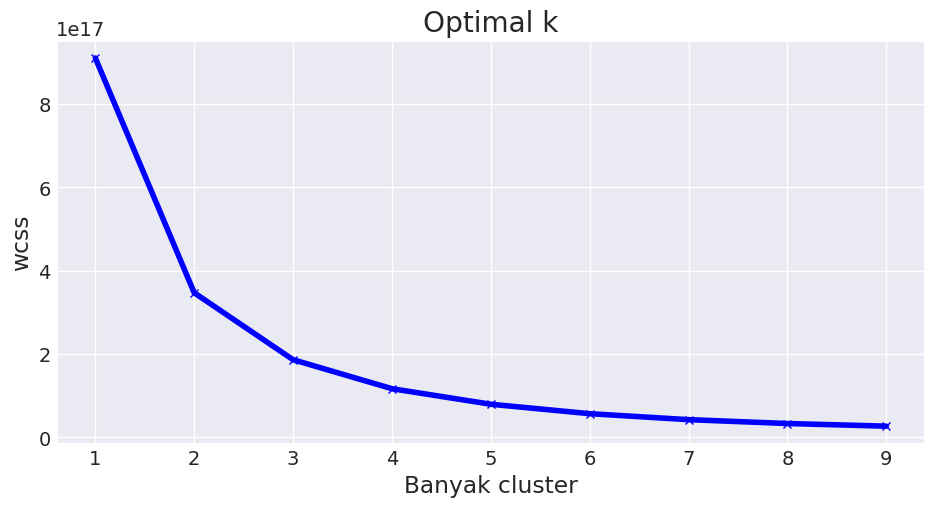

In [ ]:
wcss = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Banyak cluster')
plt.ylabel('wcss')
plt.title('Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


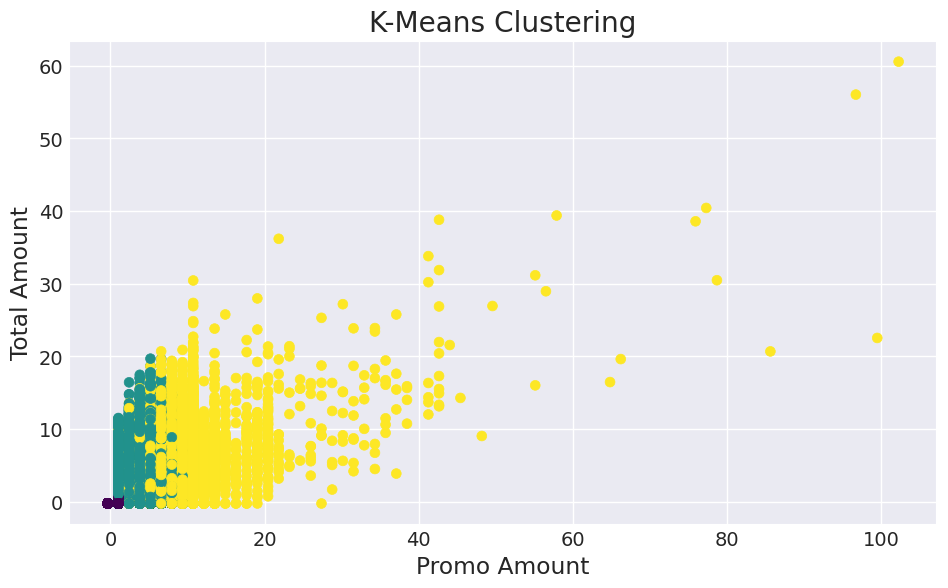

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the results in a 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Promo Amount')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
cust_tpc['cluster_KMEANS'] = y_kmeans
cust_tpc

,customer_id,gender,ages,home_location,home_location_lat,home_location_long,home_country,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum_hours,cluster_KMEANS
0,8193,F,25,Jakarta Raya,-6.21,106.82,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
1,72203,M,36,Yogyakarta,-7.94,110.37,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
2,94370,F,20,Jawa Timur,-7.78,113.87,Indonesia,2019-01,2,0,0,10000,563834,0,1,0,0,1,2,0,0,2,0,0,0,0,0,2,2,12,13,5,2,15,9,60,0,649.10,1
3,97883,F,19,Jakarta Raya,-6.22,106.78,Indonesia,2019-01,1,5821,1,10000,192999,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,5,0,2752.01,1
4,3434,M,20,Sulawesi Tenggara,-3.29,121.07,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754861,34743,M,21,Lampung,-5.20,105.64,Indonesia,2022-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
2754862,72065,M,24,Aceh,4.47,95.90,Indonesia,2022-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
2754863,32818,F,29,Maluku,-3.33,127.03,Indonesia,2022-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
2754864,75597,M,21,Jambi,-2.17,101.50,Indonesia,2022-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0


In [ ]:
cust_tpc.shape


(2754866, 39)

In [ ]:
cust_tpc['cluster_KMEANS'].value_counts()

0    2455689
1     266083
2      33094
Name: cluster_KMEANS, dtype: int64

In [ ]:
path = '/content/drive/MyDrive/Data Preprocessing'

In [ ]:
cust_tpc.to_csv (path + 'clustering2.csv', index=False)

## Perbandingan masing-masing cluster

In [ ]:
cust_tpc[cust_tpc['cluster_KMEANS'] == 0].describe()

,customer_id,ages,home_location_lat,home_location_long,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum_hours,cluster_KMEANS
count,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00,2455689.00
mean,49993.38,24.70,-5.11,110.94,0.08,6.70,0.00,693.14,22811.25,0.03,0.01,0.02,0.01,0.02,0.09,0.02,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.17,0.08,0.18,0.20,0.10,0.04,0.12,0.08,0.87,0.09,26.26,0.00
std,28849.69,7.35,3.09,6.33,0.26,116.93,0.06,3536.09,91108.00,0.16,0.11,0.12,0.08,0.12,0.35,0.15,0.20,0.13,0.01,0.00,0.07,0.01,0.06,0.84,0.30,1.19,1.73,0.75,0.31,0.83,0.61,5.04,1.66,153.29,0.00
min,1.00,3.00,-10.85,95.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,25061.00,19.00,-7.37,106.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,49997.00,24.00,-6.24,110.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,74922.00,29.00,-3.09,113.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,100000.00,68.00,5.82,140.99,1.00,3019.00,1.00,50000.00,1247004.00,1.00,1.00,1.00,1.00,1.00,5.00,3.00,4.00,3.00,1.00,1.00,3.00,1.00,2.00,57.00,4.00,120.00,332.00,108.00,36.00,78.00,87.00,498.00,366.00,3392.09,0.00


In [ ]:
cluster_0_stats = cust_tpc[cust_tpc['cluster_KMEANS'] == 0][['booking_idcount', 'promo_amountsum', 'total_amountsum', 'quantitysum', 'lama_browsesum_hours']].describe().loc[['mean', 'std']]

# Membuat DataFrame dari hasil statistik
cluster_0_stats_df = pd.DataFrame(cluster_0_stats)

# Menampilkan DataFrame sebagai tabel Markdown
print(cluster_0_stats_df.to_markdown())

|      |   booking_idcount |   promo_amountsum |   total_amountsum |   quantitysum |   lama_browsesum_hours |
|:-----|------------------:|------------------:|------------------:|--------------:|-----------------------:|
| mean |         0.0756688 |           6.69842 |           22811.2 |     0.0917779 |                26.2609 |
| std  |         0.264467  |         116.93    |           91108   |     0.350433  |               153.287  |


In [ ]:
cust_tpc[cust_tpc['cluster_KMEANS'] == 1].describe()

,customer_id,ages,home_location_lat,home_location_long,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum_hours,cluster_KMEANS
count,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00,266083.00
mean,49931.99,24.51,-5.08,110.98,1.57,4507.57,0.83,14474.56,747417.60,0.55,0.25,0.32,0.14,0.32,2.99,0.54,1.03,0.44,0.01,0.00,0.11,0.00,1.06,6.04,2.14,6.49,6.26,3.32,1.58,4.34,3.06,30.80,3.48,616.63,1.00
std,29072.33,7.36,3.11,6.49,0.85,4012.94,0.60,14101.14,583370.75,0.82,0.59,0.65,0.42,0.65,2.25,0.74,1.02,0.67,0.07,0.01,0.34,0.03,1.08,9.65,1.48,9.22,11.85,5.43,2.59,6.57,4.89,38.74,14.49,1202.95,0.00
min,3.00,4.00,-10.81,95.31,1.00,0.00,0.00,0.00,15203.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,24602.00,19.00,-7.37,106.86,1.00,0.00,0.00,10000.00,296492.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,2.00,0.00,0.00,1.00,0.00,10.00,0.00,115.80,1.00
50%,49815.00,24.00,-6.24,110.16,1.00,4202.00,1.00,10000.00,563019.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,2.00,4.00,4.00,2.00,1.00,2.00,1.00,19.00,0.00,278.06,1.00
75%,75166.00,29.00,-3.03,113.26,2.00,6589.00,1.00,20000.00,1042011.50,1.00,0.00,0.00,0.00,0.00,4.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,3.00,8.00,7.00,4.00,2.00,6.00,4.00,38.00,0.00,572.84,1.00
max,99998.00,67.00,5.55,140.98,7.00,41225.00,6.00,155000.00,4108081.00,7.00,7.00,7.00,6.00,7.00,17.00,7.00,9.00,6.00,2.00,1.00,4.00,1.00,11.00,220.00,11.00,306.00,1092.00,234.00,92.00,216.00,189.00,1680.00,820.00,22939.46,1.00


In [ ]:
cluster_1_stats = cust_tpc[cust_tpc['cluster_KMEANS'] == 1][['booking_idcount', 'promo_amountsum', 'total_amountsum', 'quantitysum', 'lama_browsesum_hours']].describe().loc[['mean', 'std']]

# Membuat DataFrame dari hasil statistik
cluster_1_stats_df = pd.DataFrame(cluster_1_stats)

# Menampilkan DataFrame sebagai tabel Markdown
print(cluster_1_stats_df.to_markdown())

|      |   booking_idcount |   promo_amountsum |   total_amountsum |   quantitysum |   lama_browsesum_hours |
|:-----|------------------:|------------------:|------------------:|--------------:|-----------------------:|
| mean |          1.57332  |           4507.57 |            747418 |       2.99201 |                616.631 |
| std  |          0.854644 |           4012.94 |            583371 |       2.25482 |               1202.95  |


In [ ]:
cust_tpc[cust_tpc['cluster_KMEANS'] == 2].describe()

,customer_id,ages,home_location_lat,home_location_long,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum_hours,cluster_KMEANS
count,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00,33094.00
mean,49809.06,24.52,-5.14,110.80,3.15,5977.70,1.11,29090.32,4084038.37,1.12,0.54,0.61,0.29,0.59,15.64,2.10,3.98,1.71,0.02,0.00,0.45,0.00,3.01,62.73,8.26,26.80,25.05,14.09,5.65,18.13,12.88,159.19,17.43,1891.31,2.00
std,29010.74,7.36,3.07,6.26,2.74,6940.88,1.18,30107.40,2146330.12,1.93,1.33,1.36,0.86,1.42,7.89,1.87,3.02,1.63,0.14,0.01,0.71,0.07,4.12,100.79,5.50,35.75,39.22,20.30,9.15,25.24,18.97,189.62,72.86,5803.91,0.00
min,20.00,4.00,-10.81,95.51,1.00,0.00,0.00,0.00,292058.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
25%,24276.25,19.00,-7.39,106.86,1.00,0.00,0.00,10000.00,2763758.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,10.00,5.00,6.00,9.00,2.00,0.00,3.00,1.00,48.00,0.00,238.63,2.00
50%,49401.00,24.00,-6.24,110.12,2.00,4339.00,1.00,20000.00,3499298.50,0.00,0.00,0.00,0.00,0.00,14.00,2.00,3.00,1.00,0.00,0.00,0.00,0.00,1.00,29.00,8.00,16.00,16.00,8.00,2.00,10.00,7.00,106.00,0.00,464.66,2.00
75%,74915.00,29.00,-3.10,113.01,4.00,9113.50,2.00,40000.00,4731675.75,1.00,1.00,1.00,0.00,1.00,18.00,3.00,5.00,3.00,0.00,0.00,1.00,0.00,4.00,80.00,11.00,34.00,30.00,18.00,7.00,23.00,16.00,202.00,4.00,1228.79,2.00
max,99998.00,66.00,5.39,140.96,74.00,125756.00,23.00,665000.00,46937792.00,55.00,45.00,31.00,42.00,58.00,180.00,27.00,61.00,27.00,3.00,1.00,9.00,1.00,51.00,2661.00,113.00,635.00,1875.00,420.00,181.00,480.00,374.00,3811.00,3350.00,262940.04,2.00


In [ ]:
cluster_2_stats = cust_tpc[cust_tpc['cluster_KMEANS'] == 2][['booking_idcount', 'promo_amountsum', 'total_amountsum', 'quantitysum', 'lama_browsesum_hours']].describe().loc[['mean', 'std']]

# Membuat DataFrame dari hasil statistik
cluster_2_stats_df = pd.DataFrame(cluster_2_stats)

# Menampilkan DataFrame sebagai tabel Markdown
print(cluster_2_stats_df.to_markdown())

|      |   booking_idcount |   promo_amountsum |   total_amountsum |   quantitysum |   lama_browsesum_hours |
|:-----|------------------:|------------------:|------------------:|--------------:|-----------------------:|
| mean |           3.14973 |           5977.7  |       4.08404e+06 |      15.6353  |                1891.31 |
| std  |           2.73586 |           6940.88 |       2.14633e+06 |       7.88507 |                5803.91 |


In [ ]:
cluster_nol = cust_tpc[cust_tpc['cluster_KMEANS'] == 0]
cluster_nol

,customer_id,gender,ages,home_location,home_location_lat,home_location_long,home_country,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum_hours,cluster_KMEANS
0,8193,F,25,Jakarta Raya,-6.21,106.82,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
1,72203,M,36,Yogyakarta,-7.94,110.37,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
4,3434,M,20,Sulawesi Tenggara,-3.29,121.07,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
5,68127,M,14,Jawa Barat,-6.65,106.57,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
6,3460,F,13,Kepulauan Riau,0.32,104.36,Indonesia,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754861,34743,M,21,Lampung,-5.20,105.64,Indonesia,2022-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
2754862,72065,M,24,Aceh,4.47,95.90,Indonesia,2022-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
2754863,32818,F,29,Maluku,-3.33,127.03,Indonesia,2022-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0
2754864,75597,M,21,Jambi,-2.17,101.50,Indonesia,2022-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0


In [ ]:
cluster_satu = cust_tpc[cust_tpc['cluster_KMEANS'] == 1]
cluster_satu

,customer_id,gender,ages,home_location,home_location_lat,home_location_long,home_country,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum_hours,cluster_KMEANS
2,94370,F,20,Jawa Timur,-7.78,113.87,Indonesia,2019-01,2,0,0,10000,563834,0,1,0,0,1,2,0,0,2,0,0,0,0,0,2,2,12,13,5,2,15,9,60,0,649.10,1
3,97883,F,19,Jakarta Raya,-6.22,106.78,Indonesia,2019-01,1,5821,1,10000,192999,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,5,0,2752.01,1
12,96759,F,18,Lampung,-5.58,105.73,Indonesia,2019-01,1,4435,1,10000,217572,1,0,0,0,0,1,0,1,0,0,0,0,0,1,4,1,4,4,2,4,3,4,27,0,51.73,1
13,96807,M,15,Yogyakarta,-7.96,110.43,Indonesia,2019-01,1,5292,1,10000,242725,0,0,0,0,1,1,0,1,0,0,0,0,0,1,2,1,4,2,1,0,3,0,14,0,0.95,1
38,44115,F,10,Sulawesi Tenggara,-5.39,122.87,Indonesia,2019-01,1,8045,1,0,484362,0,0,1,0,0,3,1,2,0,0,0,0,0,3,18,3,15,9,3,0,3,6,60,0,356.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654805,57339,M,28,Jawa Barat,-6.71,106.96,Indonesia,2022-07,3,4855,1,30000,566168,3,0,0,0,0,3,1,1,1,0,0,0,0,1,3,3,10,8,2,1,4,6,25,13,387.35,1
2654827,92122,M,21,Jawa Timur,-6.94,111.97,Indonesia,2022-07,1,5523,1,15000,291367,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,7,3,3,1,5,4,26,0,83.87,1
2654859,102,F,36,Maluku,-3.24,127.93,Indonesia,2022-07,3,0,0,40000,901715,3,0,0,0,0,3,0,0,3,0,0,0,0,0,3,3,9,6,3,1,4,2,24,7,102.02,1
2654861,34743,M,21,Lampung,-5.20,105.64,Indonesia,2022-07,2,3200,1,10000,398509,1,1,0,0,0,3,0,2,0,0,0,0,0,1,2,2,15,18,8,3,13,7,69,0,424.80,1


In [ ]:
cluster_dua = cust_tpc[cust_tpc['cluster_KMEANS'] == 2]
cluster_dua

,customer_id,gender,ages,home_location,home_location_lat,home_location_long,home_country,partition_date,booking_idcount,promo_amountsum,promo_codecount,shipment_feesum,total_amountsum,payment_method_Credit Cardsum,payment_method_Debit Cardsum,payment_method_Gopaysum,payment_method_LinkAjasum,payment_method_OVOsum,quantitysum,masterCategory_Accessoriessum,masterCategory_Apparelsum,masterCategory_Footwearsum,masterCategory_Free Itemssum,masterCategory_Homesum,masterCategory_Personal Caresum,masterCategory_Sporting Goodssum,event_name_ADD_PROMOsumsum,event_name_ADD_TO_CARTsumsum,event_name_BOOKINGsumsum,event_name_CLICKsumsum,event_name_HOMEPAGEsumsum,event_name_ITEM_DETAILsumsum,event_name_PROMO_PAGEsumsum,event_name_SCROLLsumsum,event_name_SEARCHsumsum,traffic_source_MOBILEsumsum,traffic_source_WEBsumsum,lama_browsesum_hours,cluster_KMEANS
162,90714,F,18,Jawa Barat,-6.72,107.79,Indonesia,2019-01,2,0,0,30000,4220886,0,0,2,0,0,19,2,4,4,0,0,1,0,0,101,11,116,129,77,23,119,46,0,622,2075.94,2
194,76270,F,16,Yogyakarta,-7.80,110.38,Indonesia,2019-01,2,0,0,0,2773861,0,0,0,0,2,11,1,1,4,0,0,1,0,0,37,7,7,7,0,0,0,0,58,0,2892.56,2
206,43835,M,25,Sumatera Utara,3.06,98.84,Indonesia,2019-01,2,2843,1,0,3250043,1,1,0,0,0,16,4,4,3,0,0,0,0,1,101,11,37,13,0,1,2,1,150,17,248.18,2
213,15616,F,17,Yogyakarta,-7.94,110.61,Indonesia,2019-01,3,7447,1,30000,6787953,2,0,0,0,1,32,7,10,6,0,0,2,0,11,291,25,28,52,48,0,51,54,560,0,2065.22,2
584,87073,M,34,Kalimantan Selatan,-3.39,115.31,Indonesia,2019-01,4,19265,3,35000,3429779,0,1,0,1,2,14,3,1,0,0,0,0,0,3,8,4,5,6,1,3,4,0,34,0,104.31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654702,36444,F,26,Bali,-8.25,115.07,Indonesia,2022-07,2,4030,1,10000,3639203,0,2,0,0,0,20,5,5,2,0,0,0,0,11,122,12,12,25,0,0,2,22,206,0,1222.07,2
2654716,87001,M,27,Maluku,-6.03,134.67,Indonesia,2022-07,10,14998,3,105000,14699357,9,0,1,0,0,60,10,20,7,0,0,0,0,3,407,37,71,75,40,12,39,39,608,115,334.75,2
2654790,85202,M,23,Jawa Tengah,-7.64,110.98,Indonesia,2022-07,2,4644,1,35000,2788318,1,0,0,0,1,11,0,4,1,0,0,0,0,1,17,5,52,22,20,2,46,31,196,0,746.47,2
2654797,21373,M,29,Bali,-8.12,114.47,Indonesia,2022-07,8,12506,1,60000,2726229,6,2,0,0,0,13,4,4,0,0,0,0,0,1,8,8,16,21,8,3,10,10,80,5,145.12,2


## Grafik Perbandingan Masing-Masing Cluster

<ipython-input-115-f1eec2209c20>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_nol['booking_idcount'], ax=ax[0, 0], color='blue', label='Cluster Nol')
<ipython-input-115-f1eec2209c20>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_satu['booking_idcount'], ax=ax[0, 1], color=

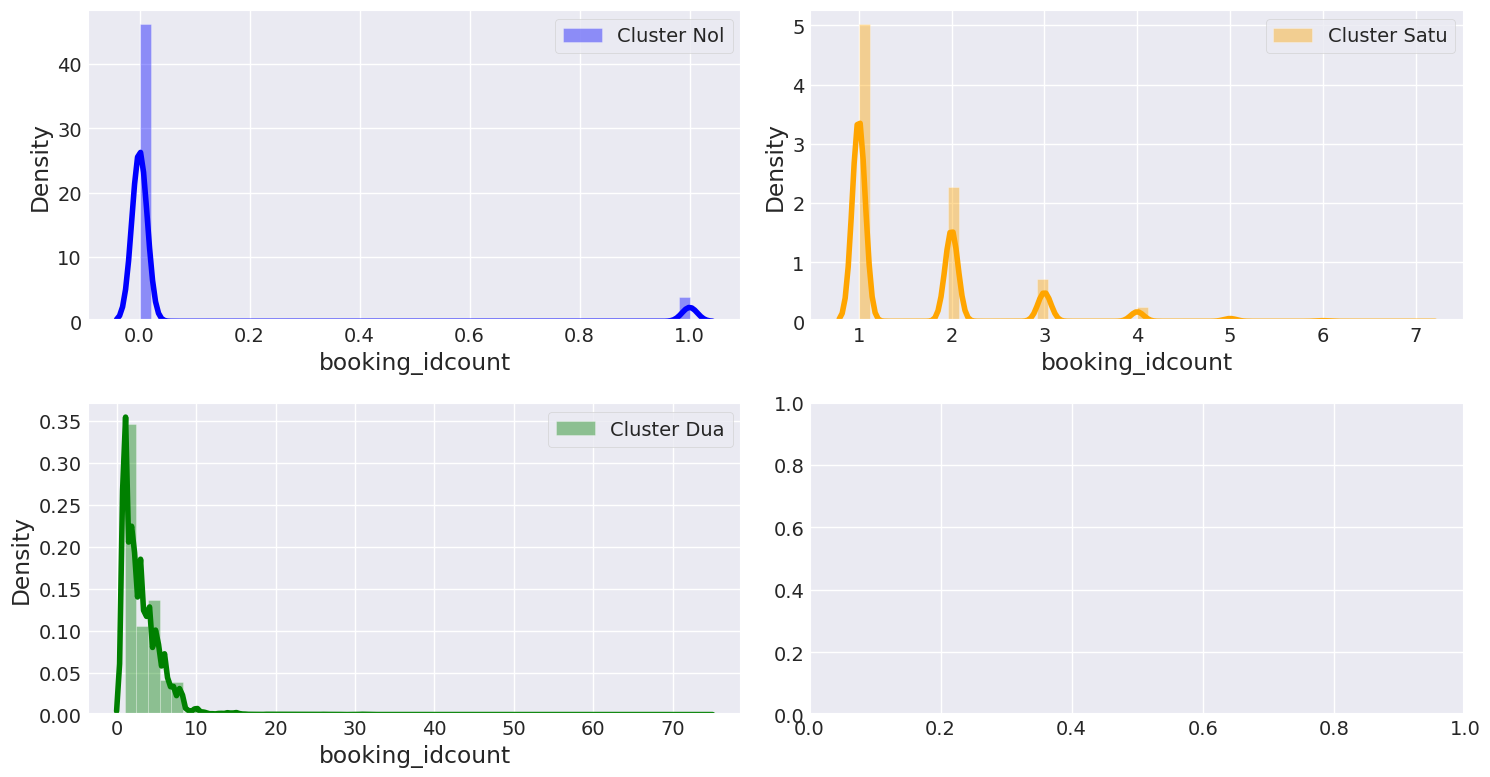

In [ ]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Membuat plot distribusi untuk setiap cluster dengan warna yang berbeda
sns.distplot(cluster_nol['booking_idcount'], ax=ax[0, 0], color='blue', label='Cluster Nol')
sns.distplot(cluster_satu['booking_idcount'], ax=ax[0, 1], color='orange', label='Cluster Satu')
sns.distplot(cluster_dua['booking_idcount'], ax=ax[1, 0], color='green', label='Cluster Dua')

# Menambahkan legenda untuk setiap plot
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
plt.tight_layout()
plt.show()

<ipython-input-116-4b415a54dd76>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_nol['promo_amountsum'], ax=ax[0, 0], color='blue', label='Cluster Nol')
<ipython-input-116-4b415a54dd76>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_satu['promo_amountsum'], ax=ax[0, 1], color=

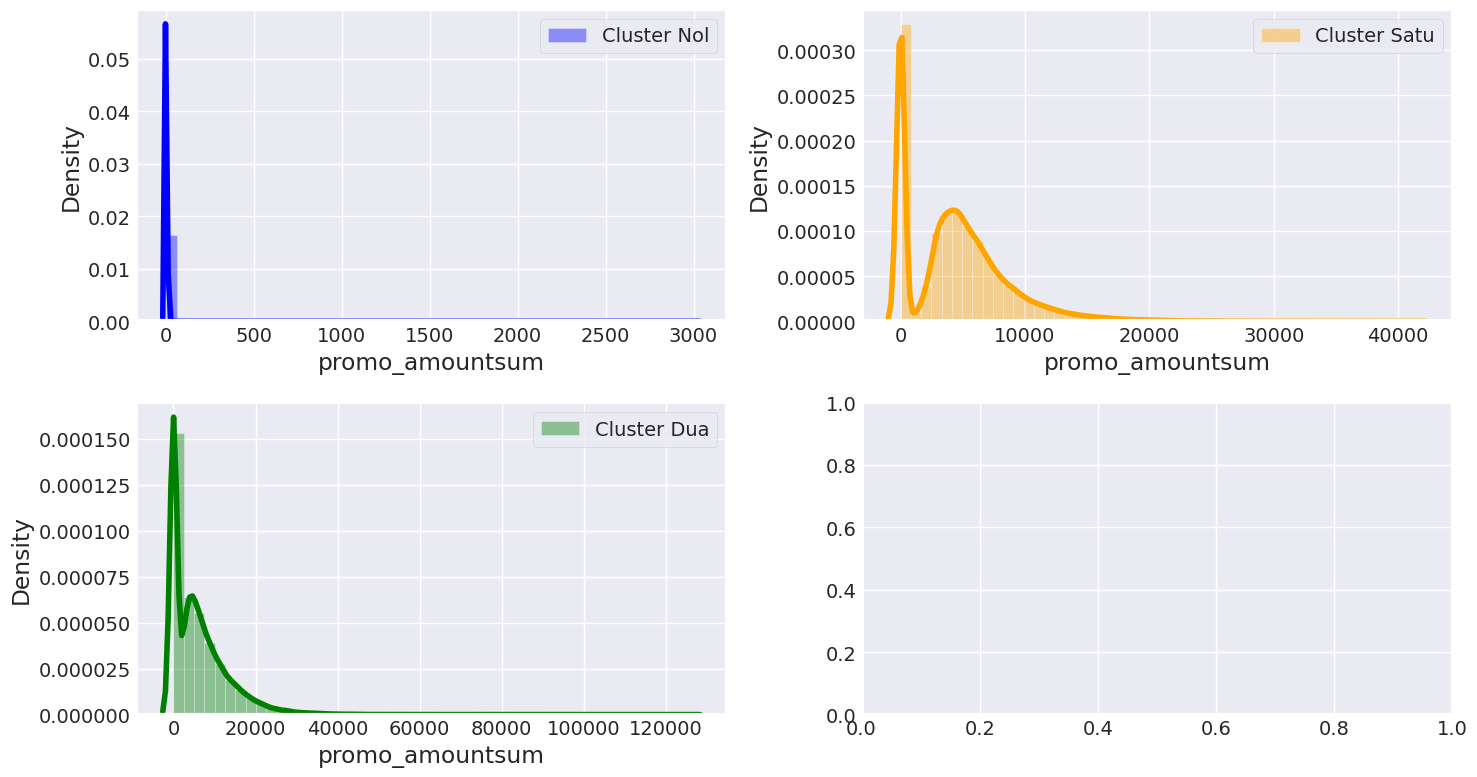

In [ ]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Membuat plot distribusi untuk setiap cluster dengan warna yang berbeda
sns.distplot(cluster_nol['promo_amountsum'], ax=ax[0, 0], color='blue', label='Cluster Nol')
sns.distplot(cluster_satu['promo_amountsum'], ax=ax[0, 1], color='orange', label='Cluster Satu')
sns.distplot(cluster_dua['promo_amountsum'], ax=ax[1, 0], color='green', label='Cluster Dua')

# Menambahkan legenda untuk setiap plot
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()

plt.tight_layout()
plt.show()

<ipython-input-117-4a97c4827f8c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_nol['total_amountsum'], ax=ax[0, 0], color='blue', label='Cluster Nol')
<ipython-input-117-4a97c4827f8c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_satu['total_amountsum'], ax=ax[0, 1], color=

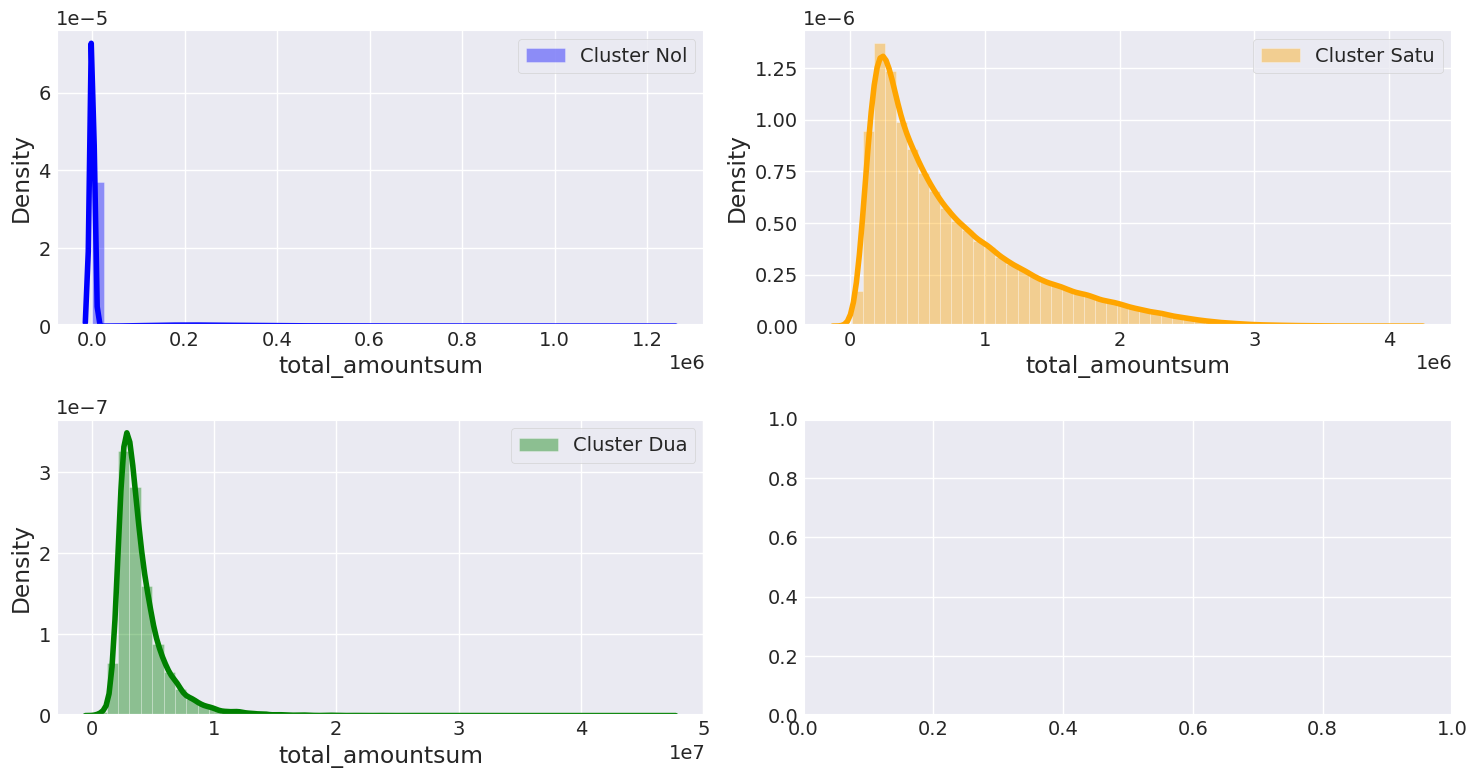

In [ ]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Membuat plot distribusi untuk setiap cluster dengan warna yang berbeda
sns.distplot(cluster_nol['total_amountsum'], ax=ax[0, 0], color='blue', label='Cluster Nol')
sns.distplot(cluster_satu['total_amountsum'], ax=ax[0, 1], color='orange', label='Cluster Satu')
sns.distplot(cluster_dua['total_amountsum'], ax=ax[1, 0], color='green', label='Cluster Dua')

# Menambahkan legenda untuk setiap plot
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()

plt.tight_layout()
plt.show()

<ipython-input-118-22399a1d6637>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_nol['quantitysum'], ax=ax[0, 0], color='blue', label='Cluster Nol')
<ipython-input-118-22399a1d6637>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_satu['quantitysum'], ax=ax[0, 1], color='orange'

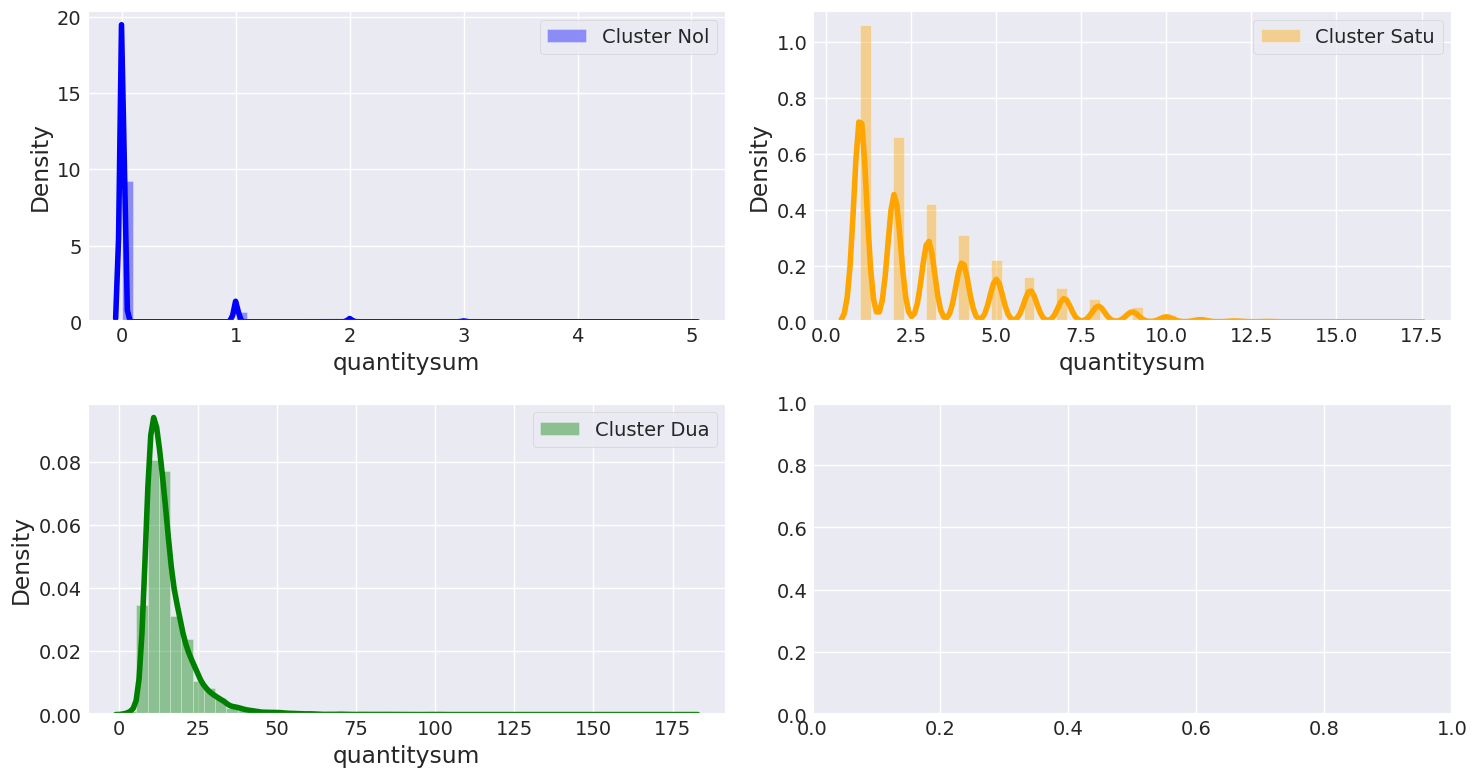

In [ ]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Membuat plot distribusi untuk setiap cluster dengan warna yang berbeda
sns.distplot(cluster_nol['quantitysum'], ax=ax[0, 0], color='blue', label='Cluster Nol')
sns.distplot(cluster_satu['quantitysum'], ax=ax[0, 1], color='orange', label='Cluster Satu')
sns.distplot(cluster_dua['quantitysum'], ax=ax[1, 0], color='green', label='Cluster Dua')

# Menambahkan legenda untuk setiap plot
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()

plt.tight_layout()
plt.show()

<ipython-input-119-70343a1e7324>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_nol['lama_browsesum_hours'], ax=ax[0, 0], color='blue', label='Cluster Nol')
<ipython-input-119-70343a1e7324>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_satu['lama_browsesum_hours'], ax=ax[0, 

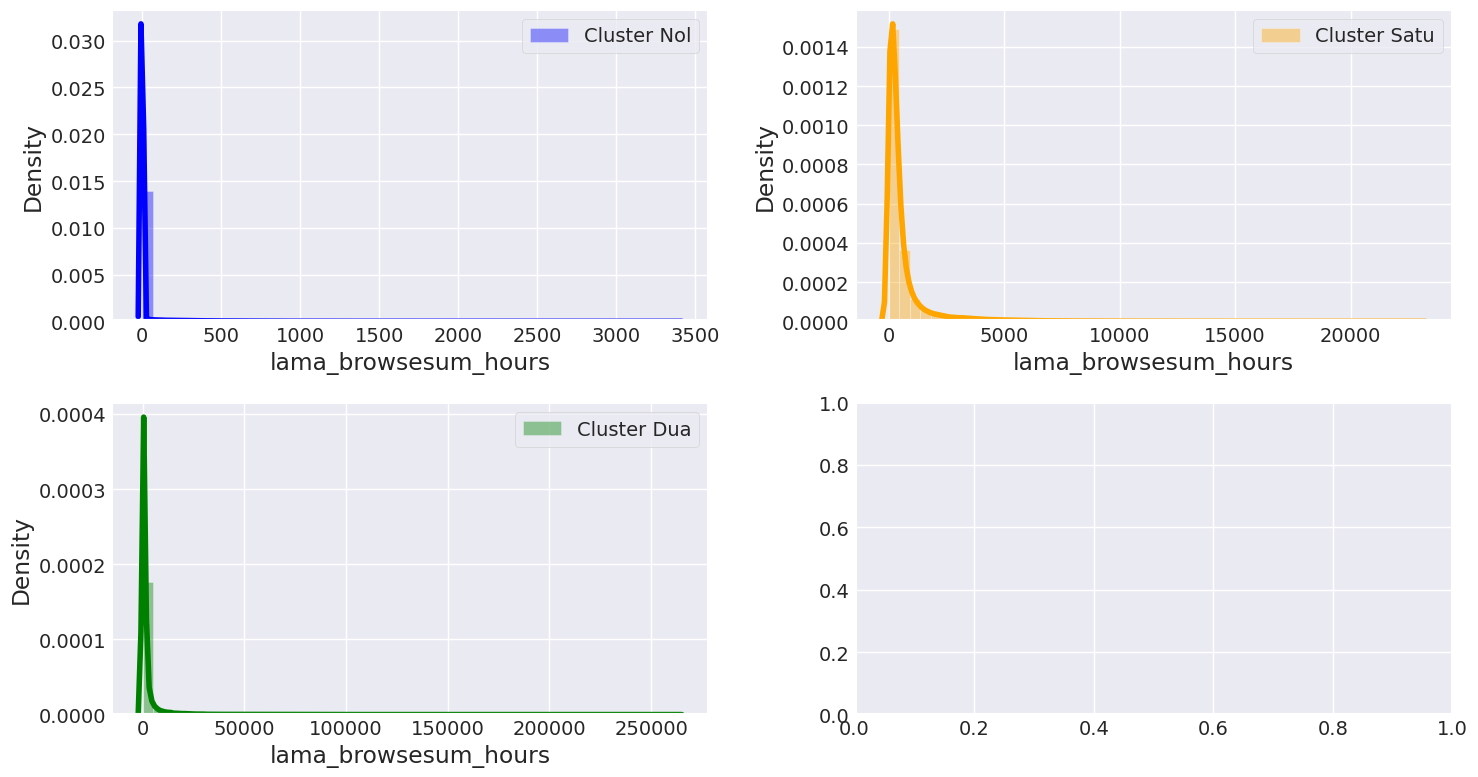

In [ ]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Membuat plot distribusi untuk setiap cluster dengan warna yang berbeda
sns.distplot(cluster_nol['lama_browsesum_hours'], ax=ax[0, 0], color='blue', label='Cluster Nol')
sns.distplot(cluster_satu['lama_browsesum_hours'], ax=ax[0, 1], color='orange', label='Cluster Satu')
sns.distplot(cluster_dua['lama_browsesum_hours'], ax=ax[1, 0], color='green', label='Cluster Dua')

# Menambahkan legenda untuk setiap plot
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()

plt.tight_layout()
plt.show()